# Lab 4 - Working with 'real' data 

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 11/1/2021
##### By Erik Solhaug
<br>

## Introduction

In this lab we are going to work on how to estimate the background from 'real' data. Real is in air quotes because the data is actually from simplified simulations to make the problems manageable in a single lab. But the data will have some features that resemble that of real data sets.

## Getting Data and HD5

In general exchanging raw data is a pain. Writing data in text files is error prone, inaccurate, and wastes space, but raw binary files have all sorts of subtleties too (including the internal byte order of your processor). To try and sidestep a whole set of nasty issues, we are going to use HDF5 (originally developed by the National Center for Supercomputing Applications for data exchange) to allow everyone to import the data.

**Instructions for downloading files on my own local machine:** 

## Python

If you are using python on your own machine, you will need to install the h5py library. Go to your Anaconda environment (if you followed the suggestions in the first lab) and search for the h5py library. Install that library into your environment, then restart your jupyter Lab or notebook session.

If you are working in the cloud python the necessary library is already installed, but you need to follow a magic incantation to download the file from the course website to your cloud instance. From the website find and copy the link address to the data file (often this means right or option-clicking on the link). Then open the terminal in your cloud instance, navigate to your working directory, and use the following command structure

So my command (your link might be different) for the first file is

Which I can see with ls -lh has downloaded a 792 MB file to my directory named gammaray_lab4.h5

Now start your lab with an import block that looks like:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

Now import the file for problem 1 using

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

Within hdf5 files you can store different kinds of data sets. Ours is simple and has one called 'data'. You can look at the header and see this using

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

You can then import the data into an array variable using the get method

In [5]:
data = np.array(hf.get('data'))

Check that your data is as expected, with a time (in gps seconds), Solar phase (deg), Earth longitude (deg), and gamma-ray counts, and more than 25 million data records. Printing the first row you should get:

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

You can then close your file

In [7]:
hf.close()

## Problem 1

In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' The meta-data is incorporated into the data file we imported above.

### 1)

The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts.

In order to get to know our data better, we will be plotting it and its metadata below to get to know it better.

Through a scavenger hunt of trial and error we will be looking for patterns in the data so that we can infer the properties of the data.

I will be using pandas to create a dataframe for my problems.

In [8]:
def plot_line_step(X, Y, start, end, step):
    fsize = 30
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.plot(X[start:end:step], Y[start:end:step], label = 'Data', linewidth = 3)
    ax.set_xlabel(f'{X.name}', fontsize = fsize)
    ax.set_ylabel(f'{Y.name}', fontsize = fsize)
    ax.set_title(f'{Y.name} vs. {X.name}', fontsize = fsize, fontweight = 'bold')
    ax.legend()
    plt.show()

In [9]:
def plot_points_step(X, Y, start, end, step):
    fsize = 30
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    ax.scatter(X[start:end:step], Y[start:end:step], label = 'Data points', linewidth = 3)
    ax.set_xlabel(f'{X.name}', fontsize = fsize)
    ax.set_ylabel(f'{Y.name}', fontsize = fsize)
    ax.set_title(f'{Y.name} vs. {X.name}', fontsize = fsize, fontweight = 'bold')
    ax.legend()
    plt.show()

In [10]:
def plot_density(t, X, start, end, step, bins):
    
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    h = ax.hist2d(t[start:end:step], X[start:end:step], bins, linewidth = 3, cmap='plasma')
    ax.set_xlabel(f'{t.name}', fontsize = fsize)
    ax.set_ylabel(f'{X.name}', fontsize = fsize)
    ax.set_title('Folded Data (2D Histogram)', fontsize = fsize, fontweight = 'bold')
    ax.set_ylim([0, 20])
    fig.colorbar(h[3], ax=ax)
    plt.show()

In [11]:
def plot_fold_density(t, X, bins, fold):
    t_mod = t % fold
#     x = np.arange(start, end, step)
#     y = np.mod(X[start:end:step], fold)
    
    fig, ax = plt.subplots(1, 1)
    plt.tick_params(labelsize = 20)
    h = ax.hist2d(t_mod, X, bins, linewidth = 3, cmap='plasma')
    ax.set_xlabel(f'{t.name}', fontsize = fsize)
    ax.set_ylabel(f'{X.name}', fontsize = fsize)
    ax.set_title('Folded Data (2D Histogram)', fontsize = fsize, fontweight = 'bold')
    fig.colorbar(h[3], ax=ax)
#     ax.set_ylim([0, 2*np.pi])
    plt.show()

We use _pandas_ to simplify our data manipulation process.

In [12]:
df = pd.DataFrame(data).T
df.columns = ['GPS Time (s)', 'Solar phase (deg)', 'Earth longitude (deg)', 'Particle counts']

We first look at how the different data columns vary with GPS Time.

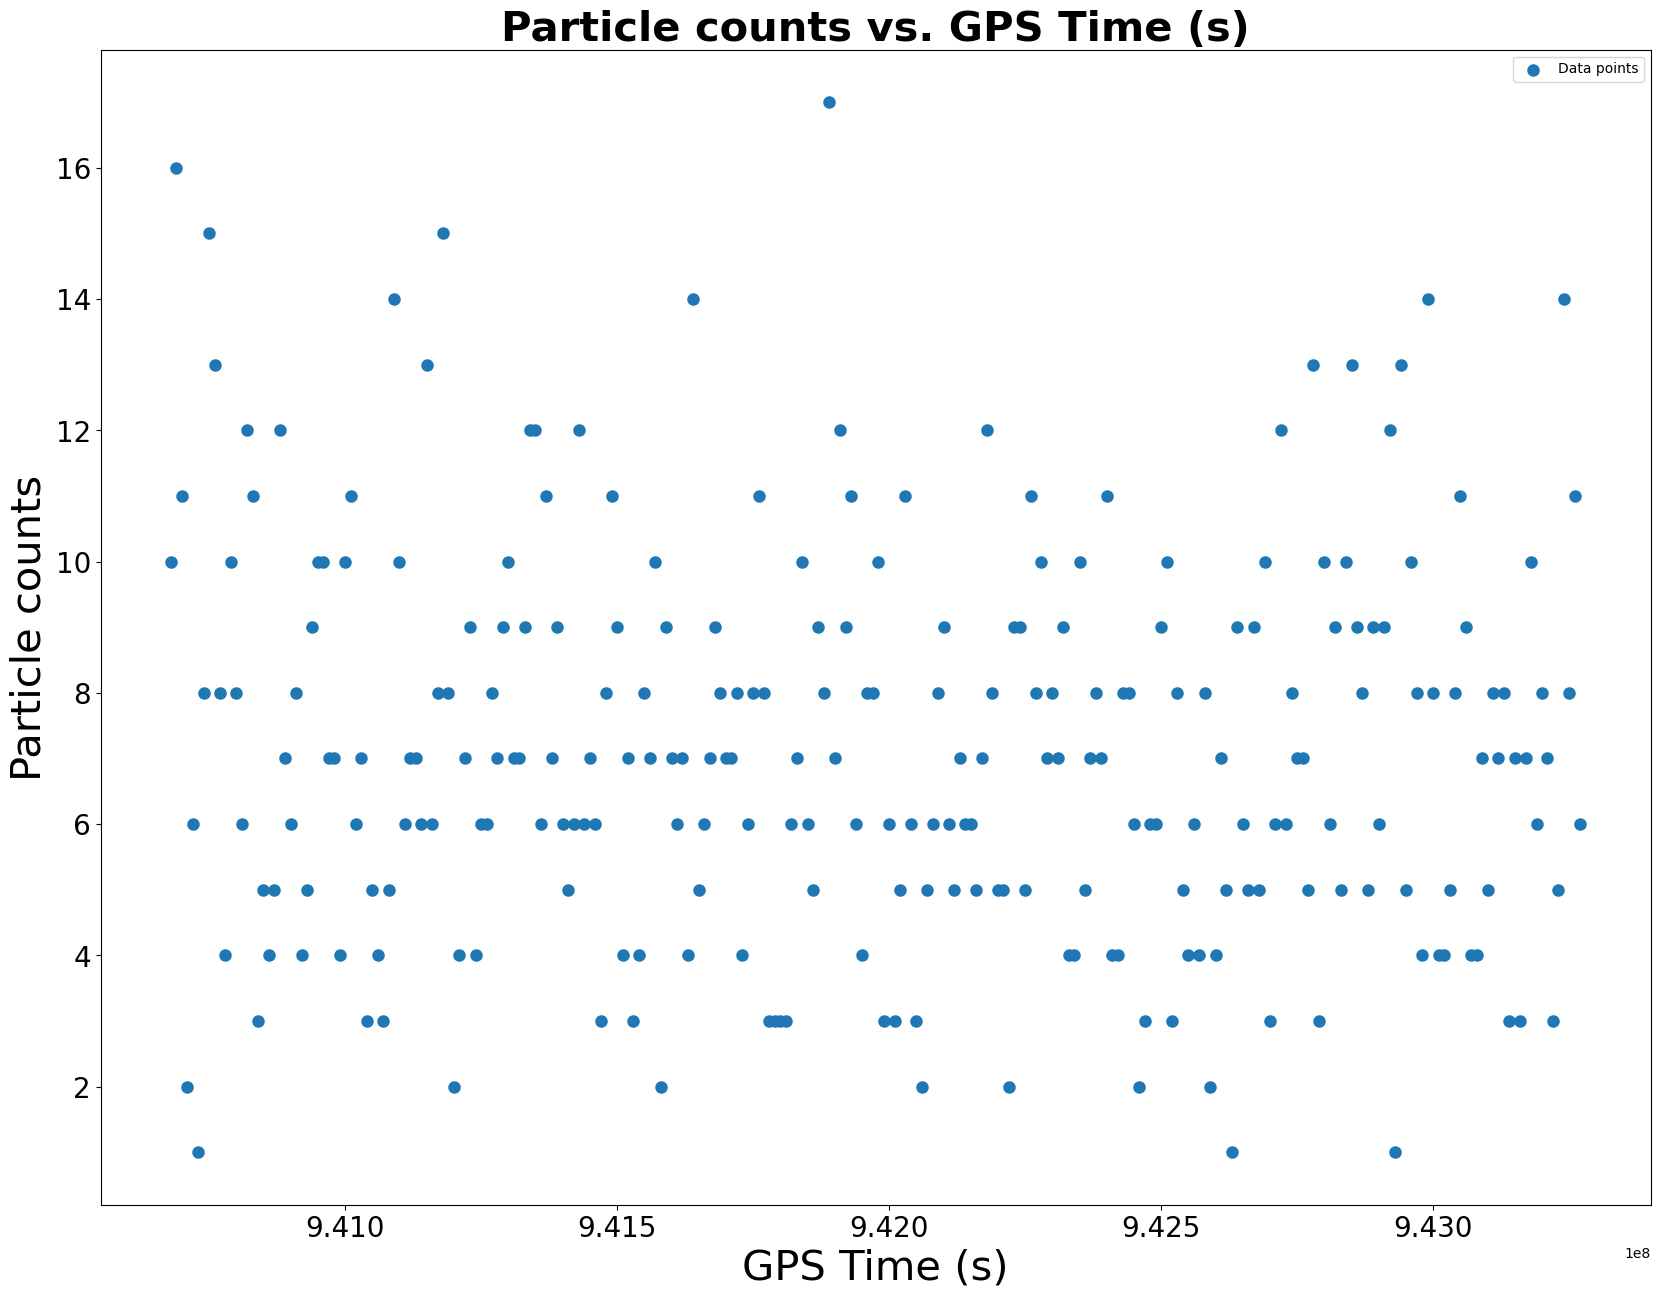

In [13]:
plot_points_step(df['GPS Time (s)'], df['Particle counts'], 0, df['GPS Time (s)'].size, 100_000)

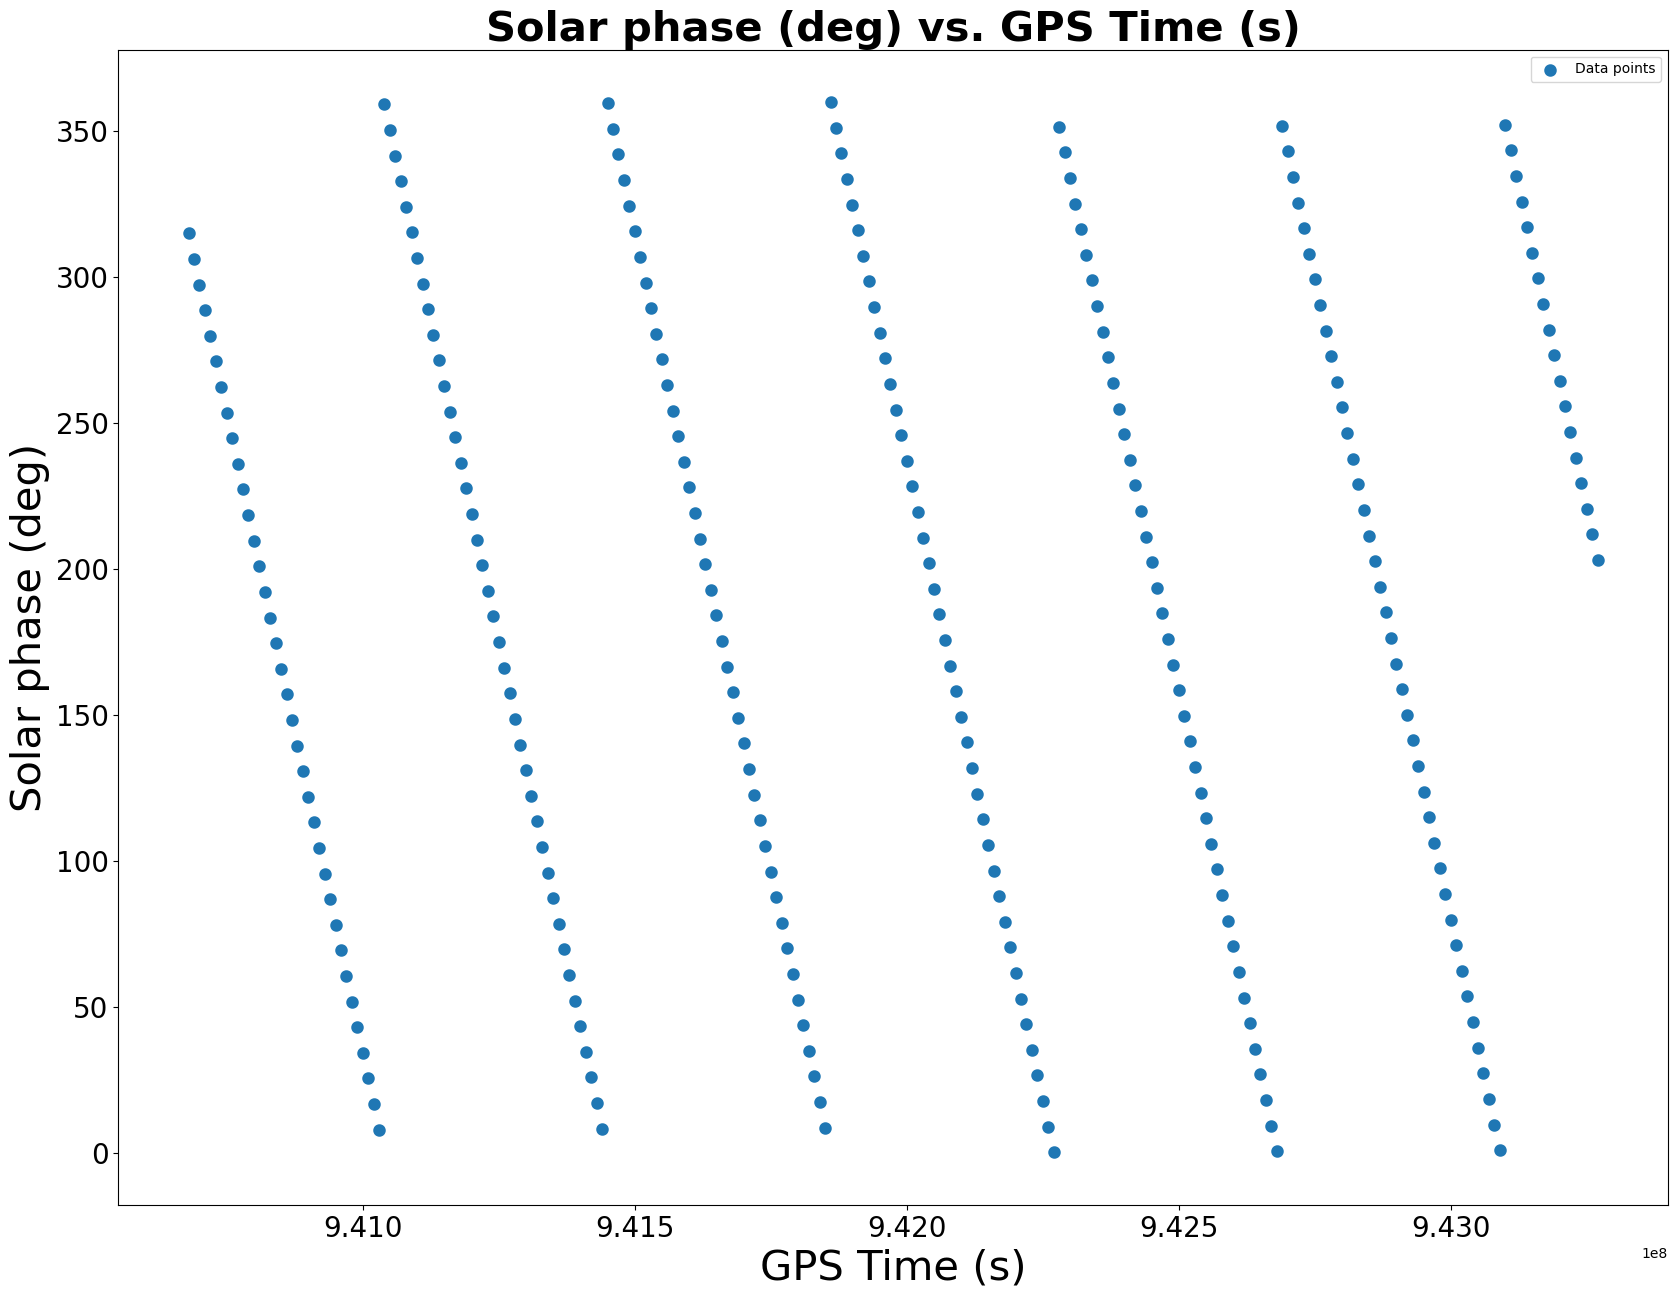

In [14]:
plot_points_step(df['GPS Time (s)'], df['Solar phase (deg)'], 0, df['GPS Time (s)'].size, 100_000)

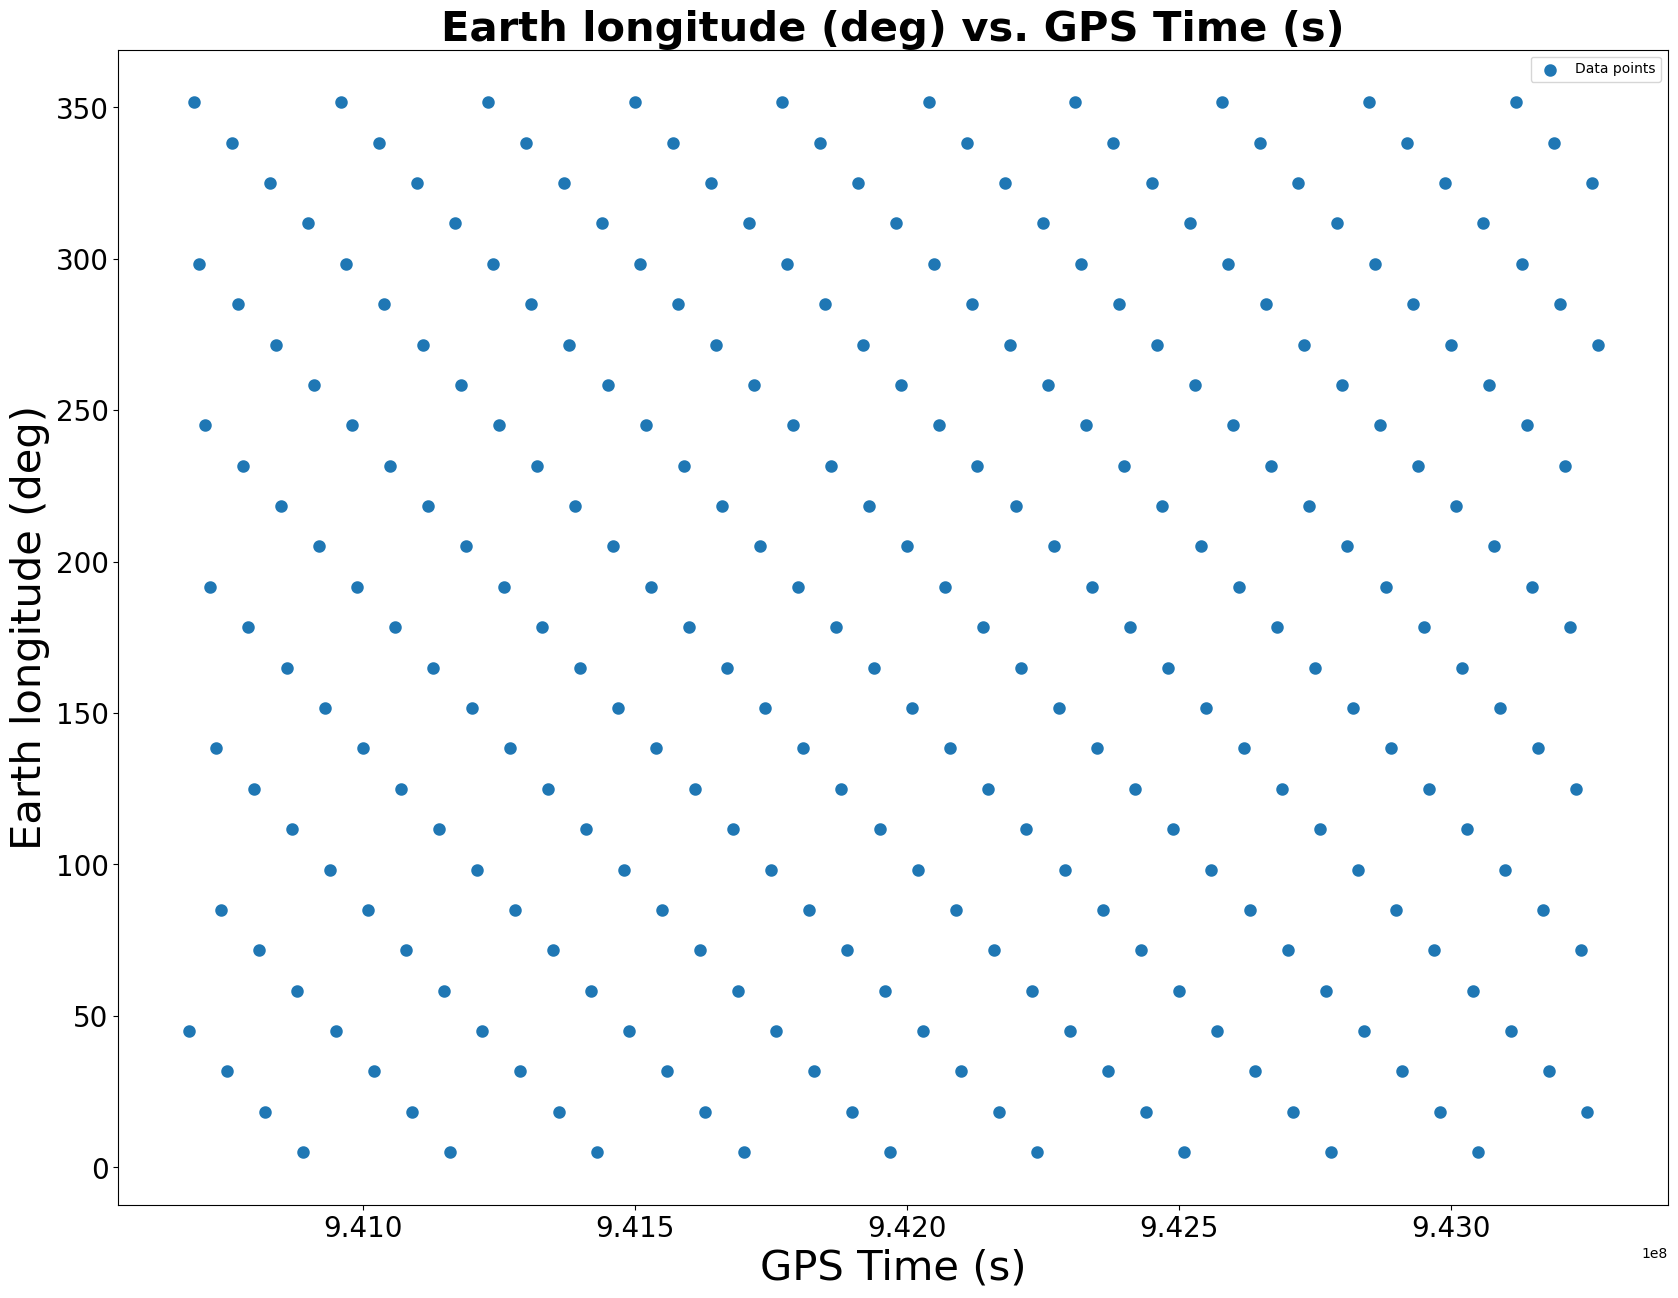

In [15]:
plot_points_step(df['GPS Time (s)'], df['Earth longitude (deg)'], 0, df['GPS Time (s)'].size, 100_000)

Then we can look at how the particle counts vary for the different data columns.

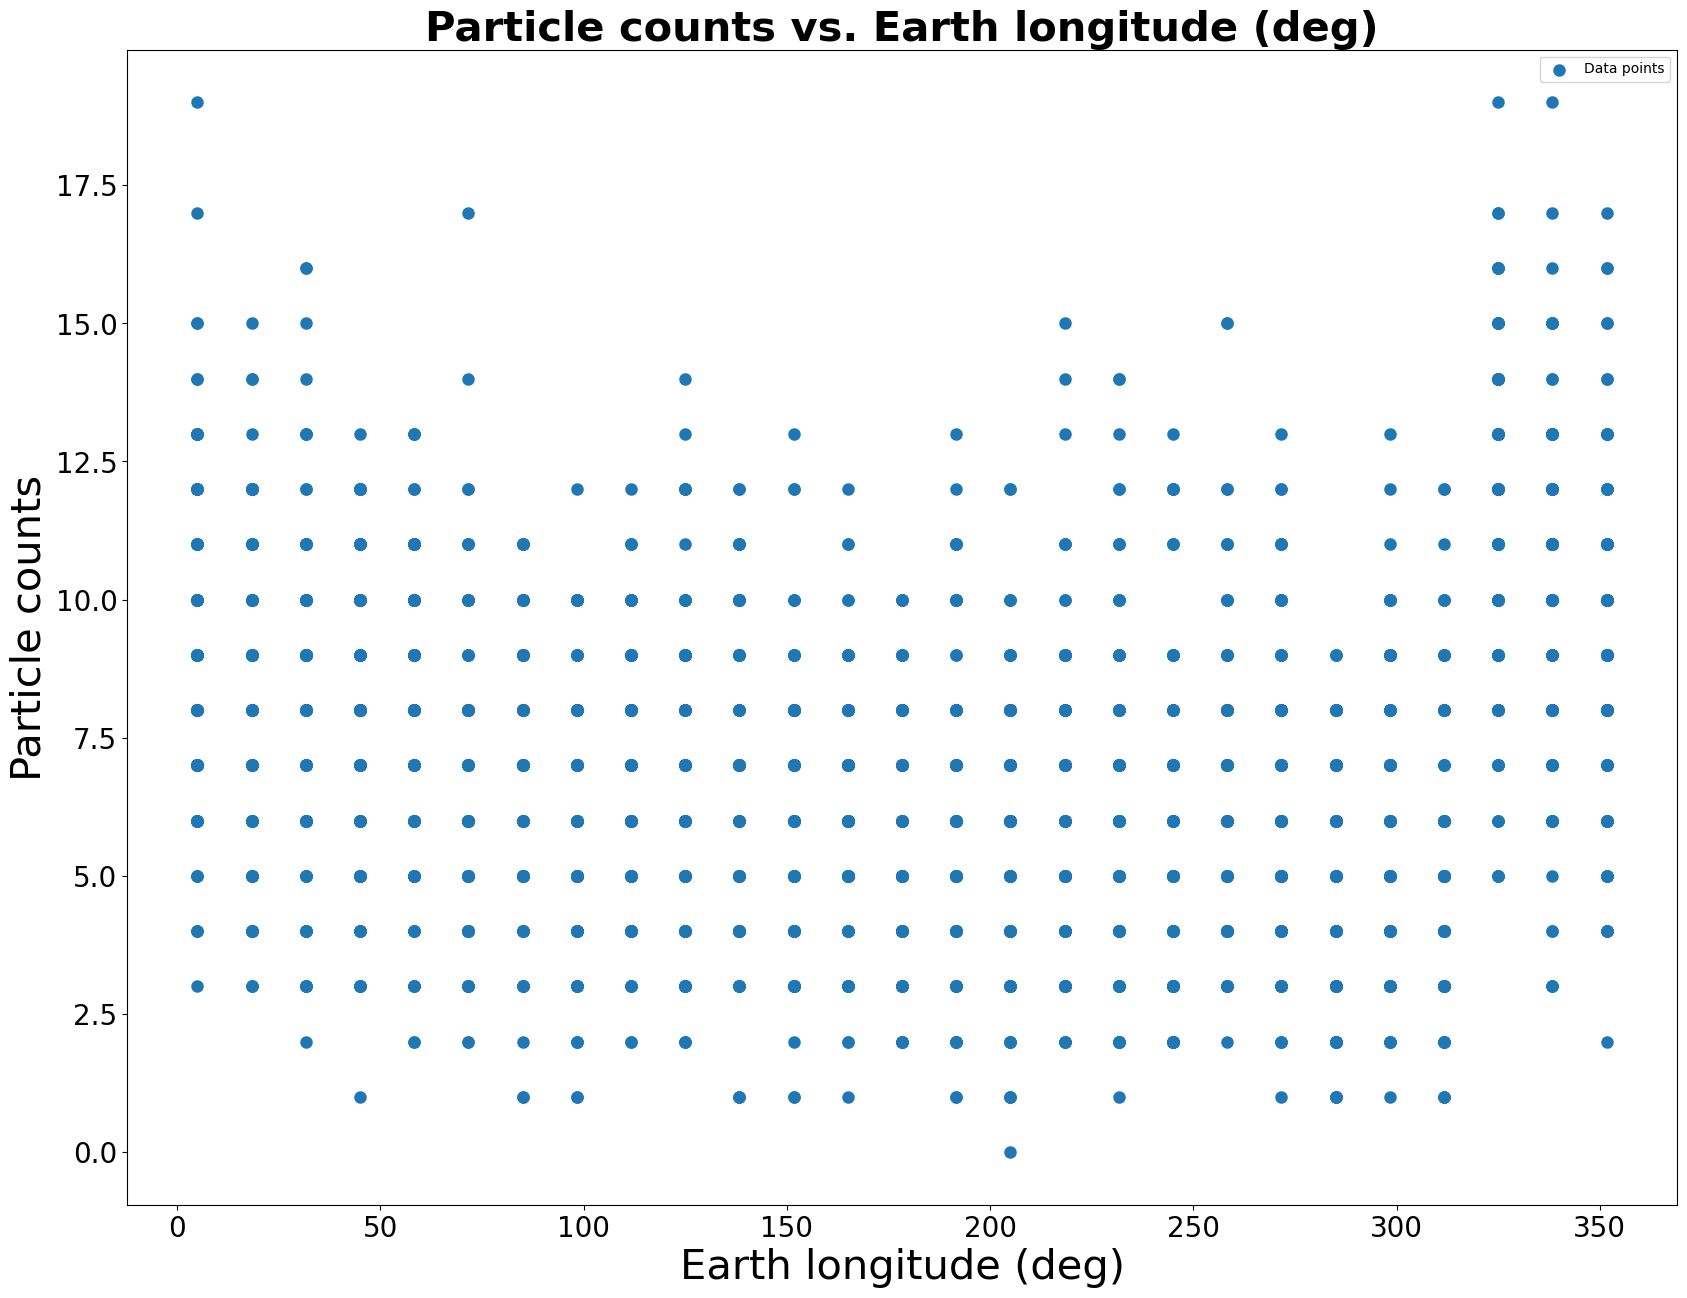

In [16]:
plot_points_step(df['Earth longitude (deg)'], df['Particle counts'], 0, df['Earth longitude (deg)'].size, 10_000)

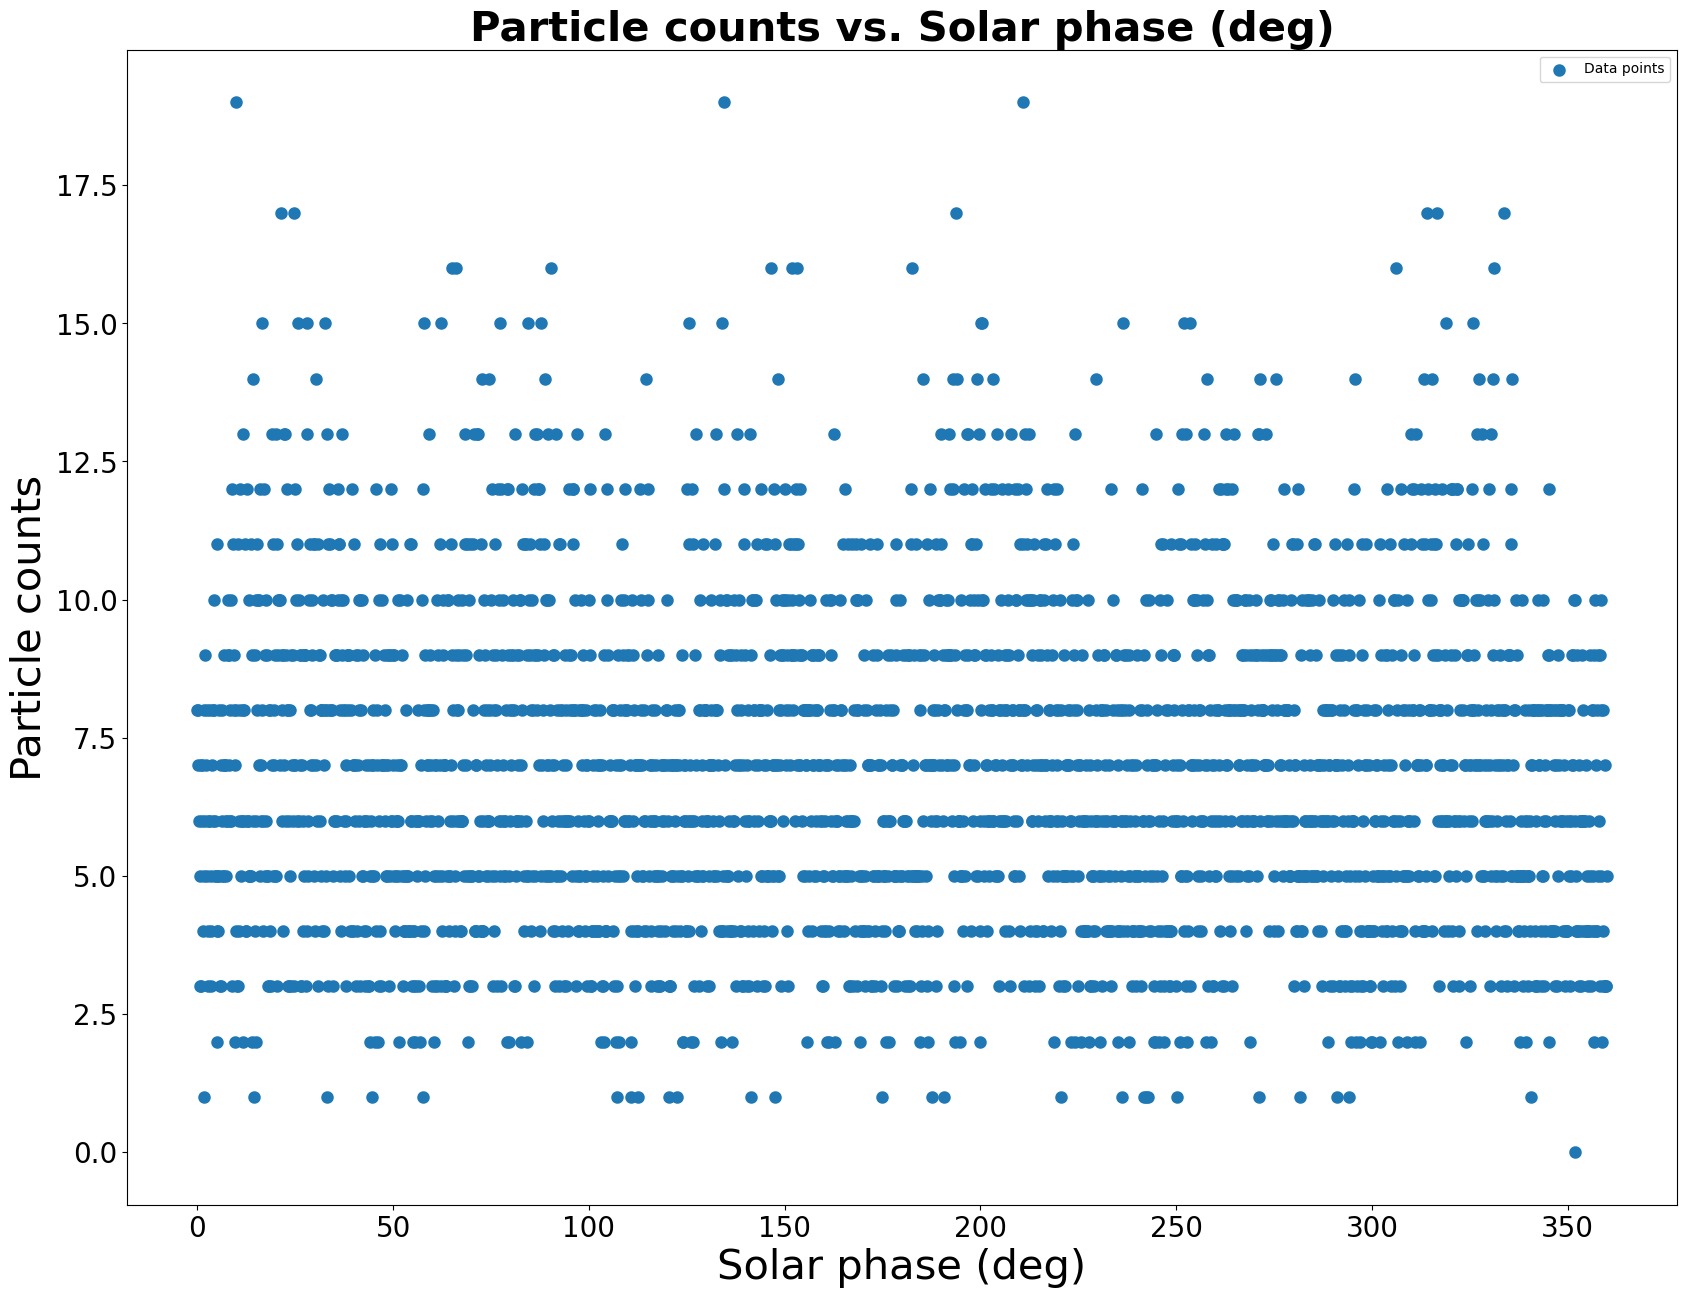

In [17]:
plot_points_step(df['Solar phase (deg)'], df['Particle counts'], 0, df['Solar phase (deg)'].size, 10_000)

Let's find out if this data follows a mathematical distribution.

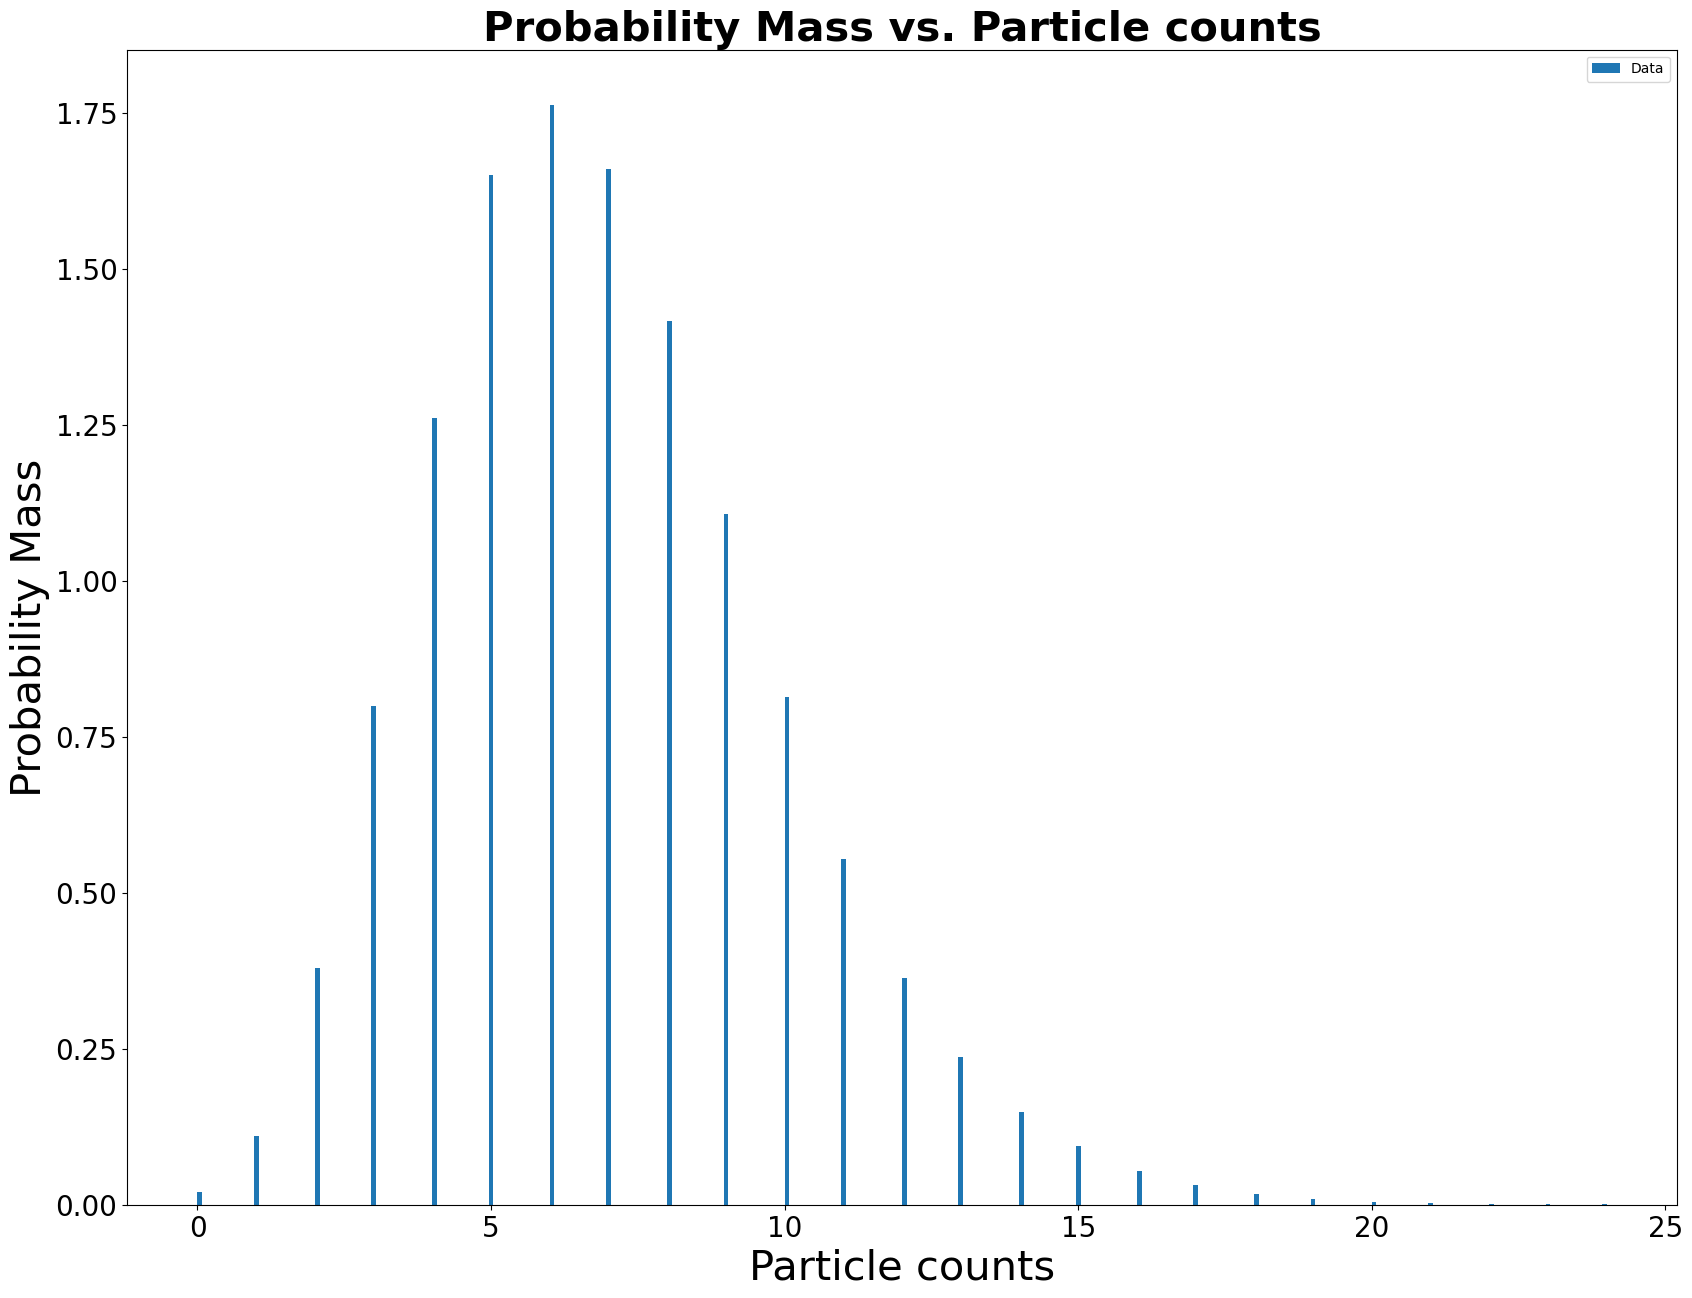

In [18]:
X = df['Particle counts']

fsize = 30
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(X[0:100_000], bins = 300, label = 'Data', linewidth = 3, density = True)
ax.set_xlabel(f'{X.name}', fontsize = fsize)
ax.set_ylabel('Probability Mass', fontsize = fsize)
ax.set_title(f'Probability Mass vs. {X.name}', fontsize = fsize, fontweight = 'bold')
ax.legend()
plt.show()

The background seems to follow a Poisson distribution. Thus, as we plan how we may create a $pdf()$ for our background distribution we take note that the background seems to follow this - a Poisson distribution. We confirm this below by plotting a Poisson distribution on top of the data.

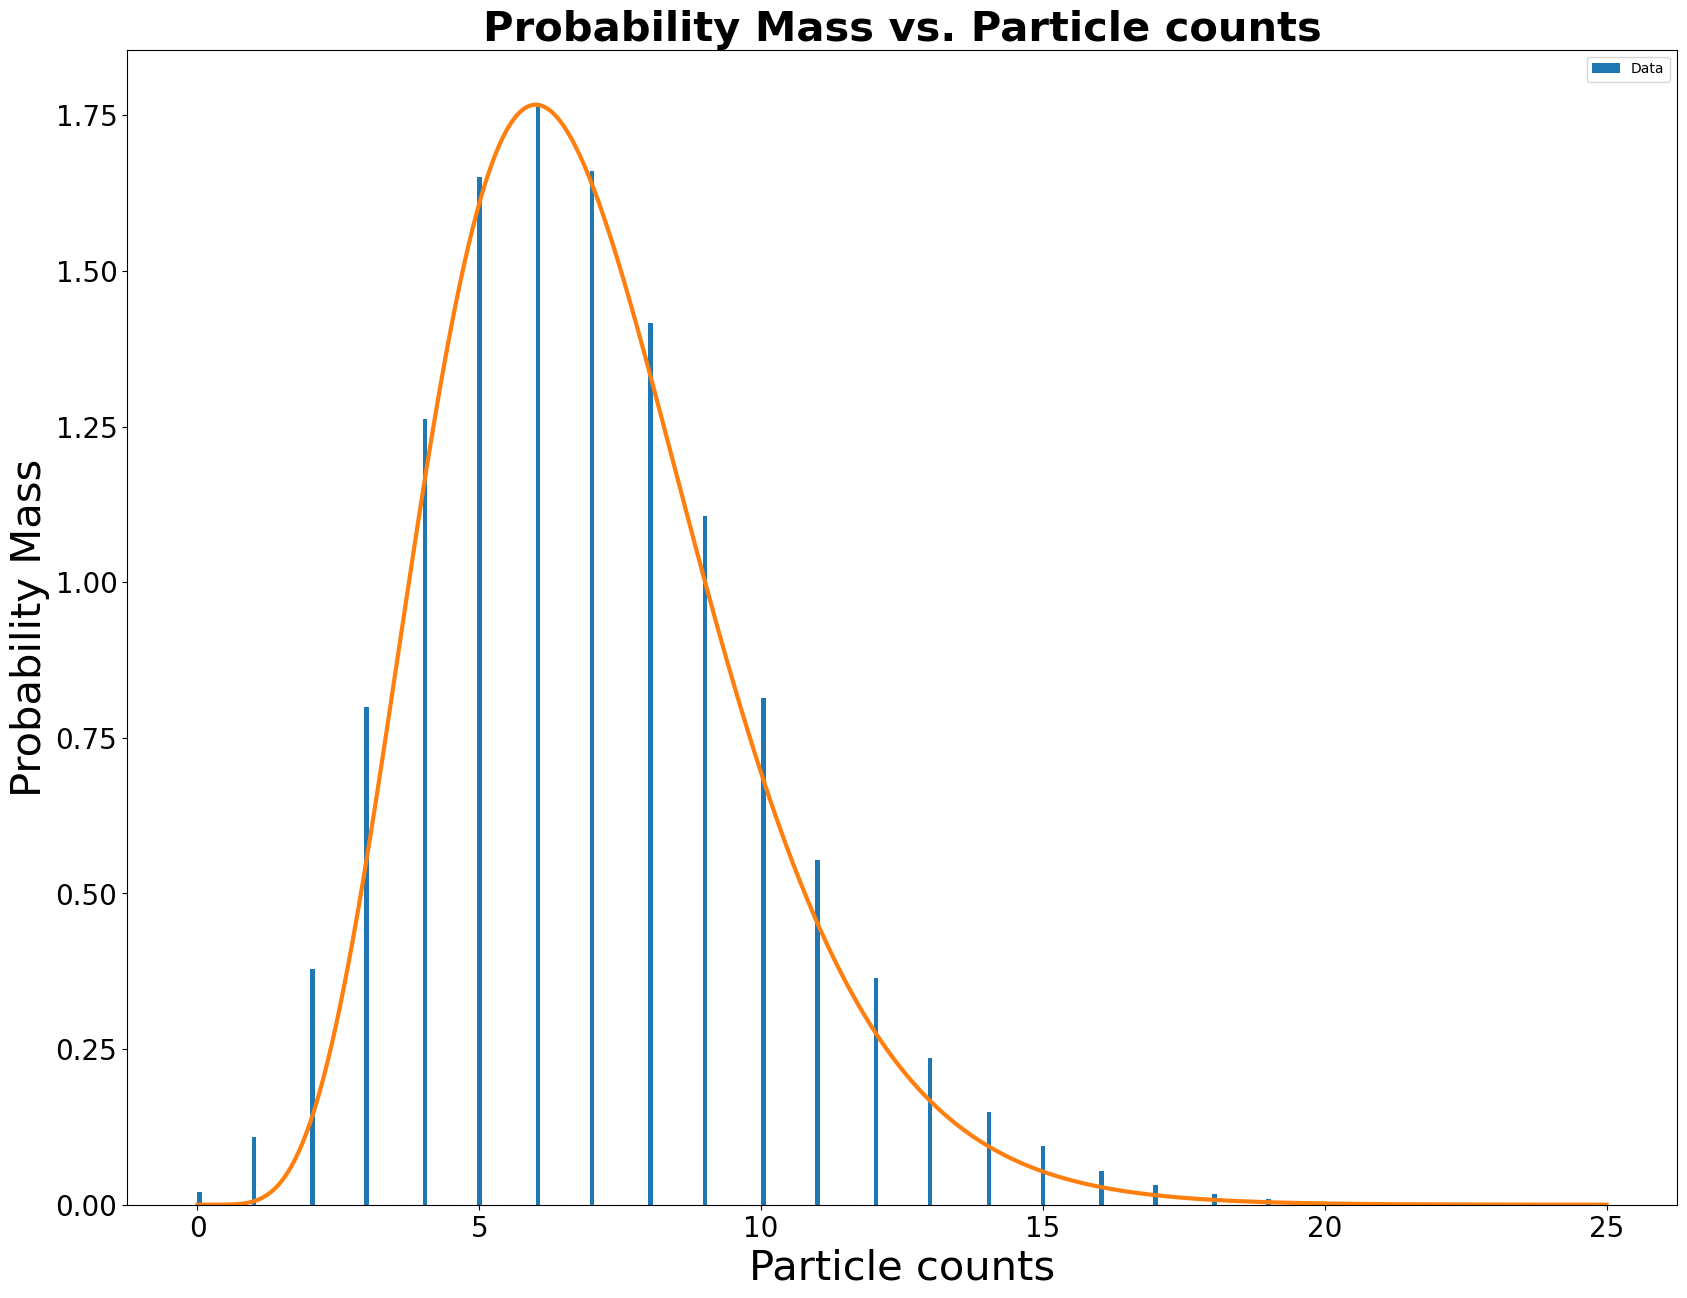

In [19]:
mean1 = 6
x = np.linspace(0,25,1000)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(X[0:100_000], bins = 300, label = 'Data', linewidth = 3, density = True)
ax.plot(x, stats.poisson.pmf(mean1, x)*11, linewidth = 3)
ax.set_xlabel(f'{X.name}', fontsize = fsize)
ax.set_ylabel('Probability Mass', fontsize = fsize)
ax.set_title(f'Probability Mass vs. {X.name}', fontsize = fsize, fontweight = 'bold')
ax.legend()
plt.show()

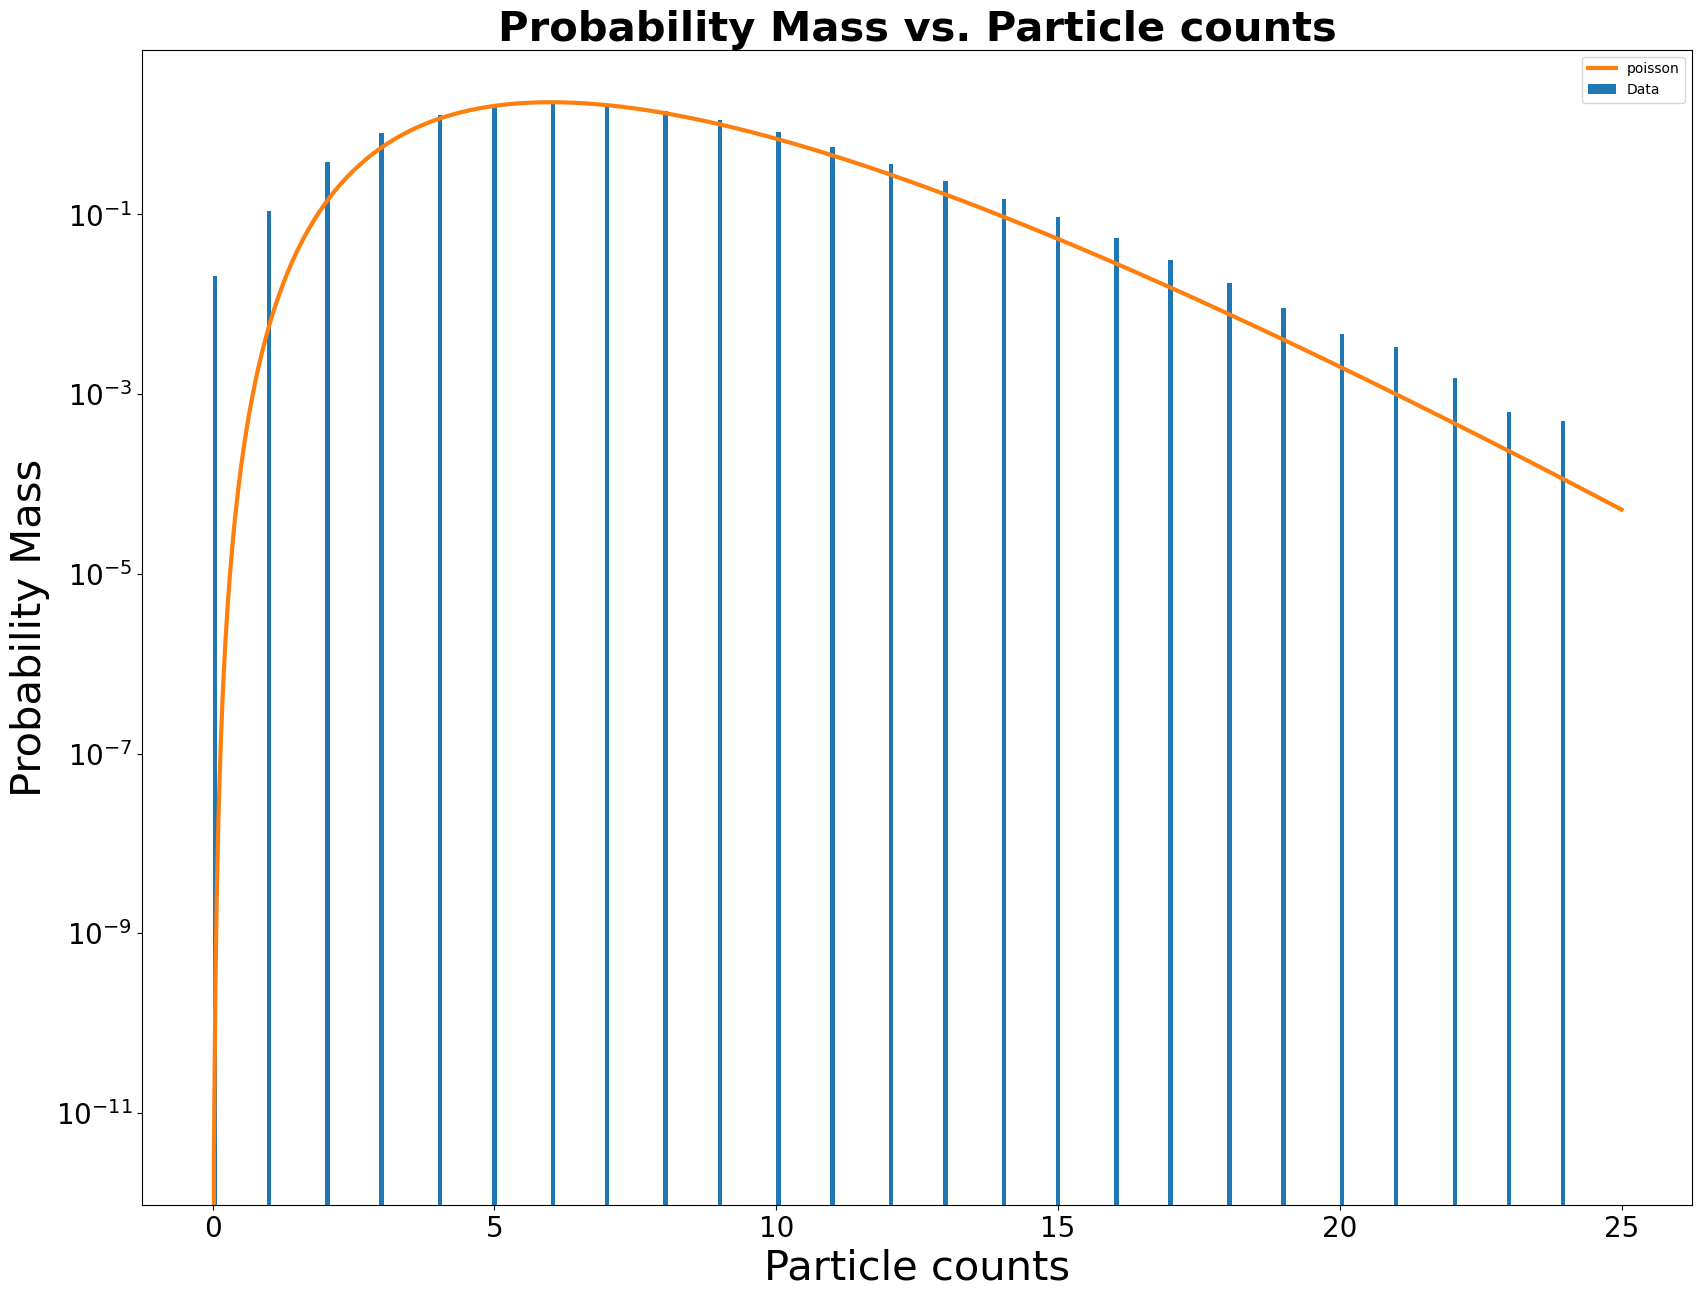

In [20]:
mean1 = 6
x = np.linspace(0,25,1000)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(X[0:100_000], bins = 300, label = 'Data', linewidth = 3, density = True)
ax.plot(x, stats.poisson.pmf(mean1, x)*11, label = 'poisson', linewidth = 3)
ax.set_xlabel(f'{X.name}', fontsize = fsize)
ax.set_ylabel('Probability Mass', fontsize = fsize)
ax.set_title(f'Probability Mass vs. {X.name}', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.legend()
plt.show()

However, we see that when we plot this distribution with a Poisson (of our own trial and error) that it is not fully represented by a Poisson distribution. We will keep this in mind in future considerations.

## 2)

The background is not consistent across the dataset, so we will find and describe as accurately as we can how the background changes.


When we plot the particle counts against the GPS Time, it is almost as if the background varies somehow periodically as we look it it closer.

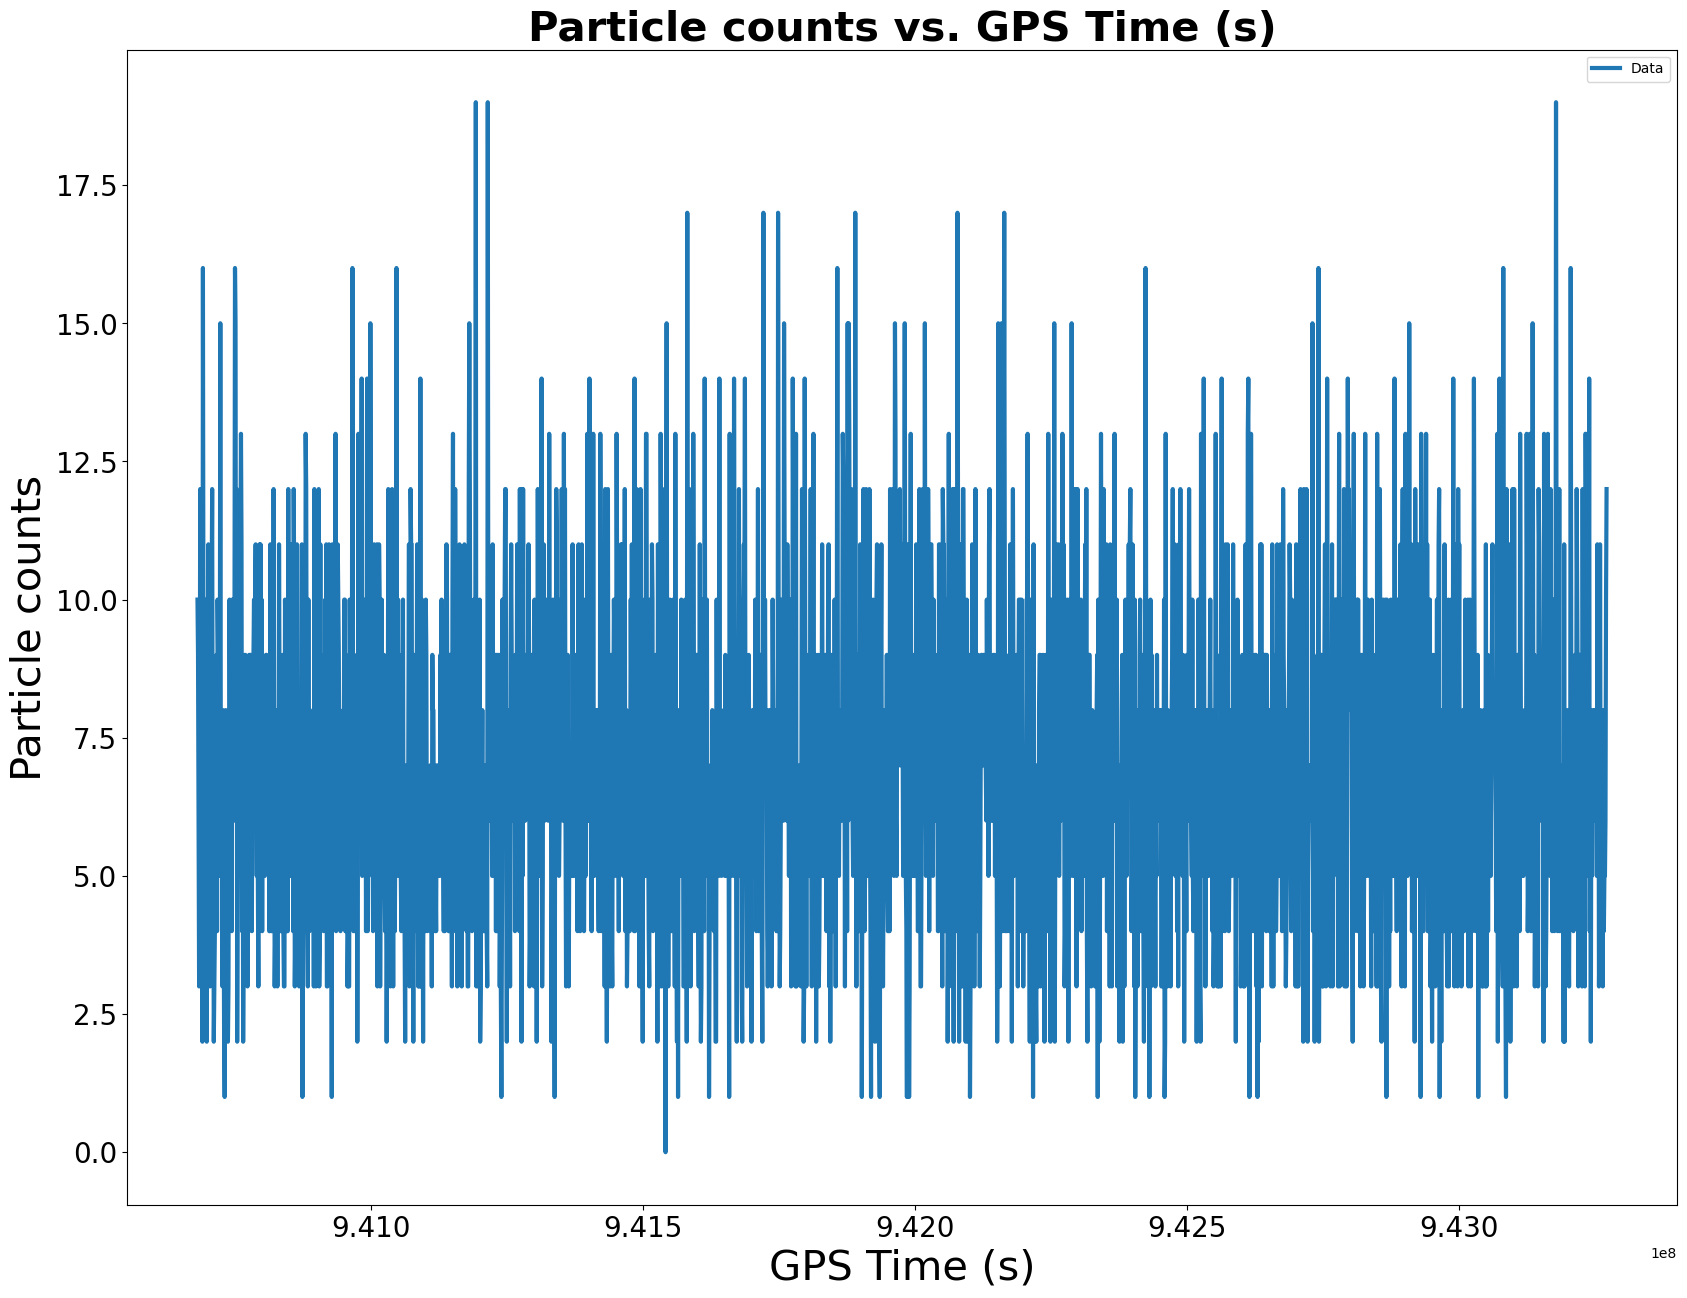

In [21]:
plot_line_step(df['GPS Time (s)'], df['Particle counts'], 0, df['GPS Time (s)'].size, 10_000)

There is a faint periodic signal here, so let's try to fold the data - by **folding** the data, we plot it over a certain **period** such that every time we cross that interval we "restart" plotting from the beginning of the x-axis resulting in a plot showing the density signal not per time, but per fraction (of some sorts) of the period. We see if the data varies by the period that the satellite encircles the Earth (its 'Earth Longitude').

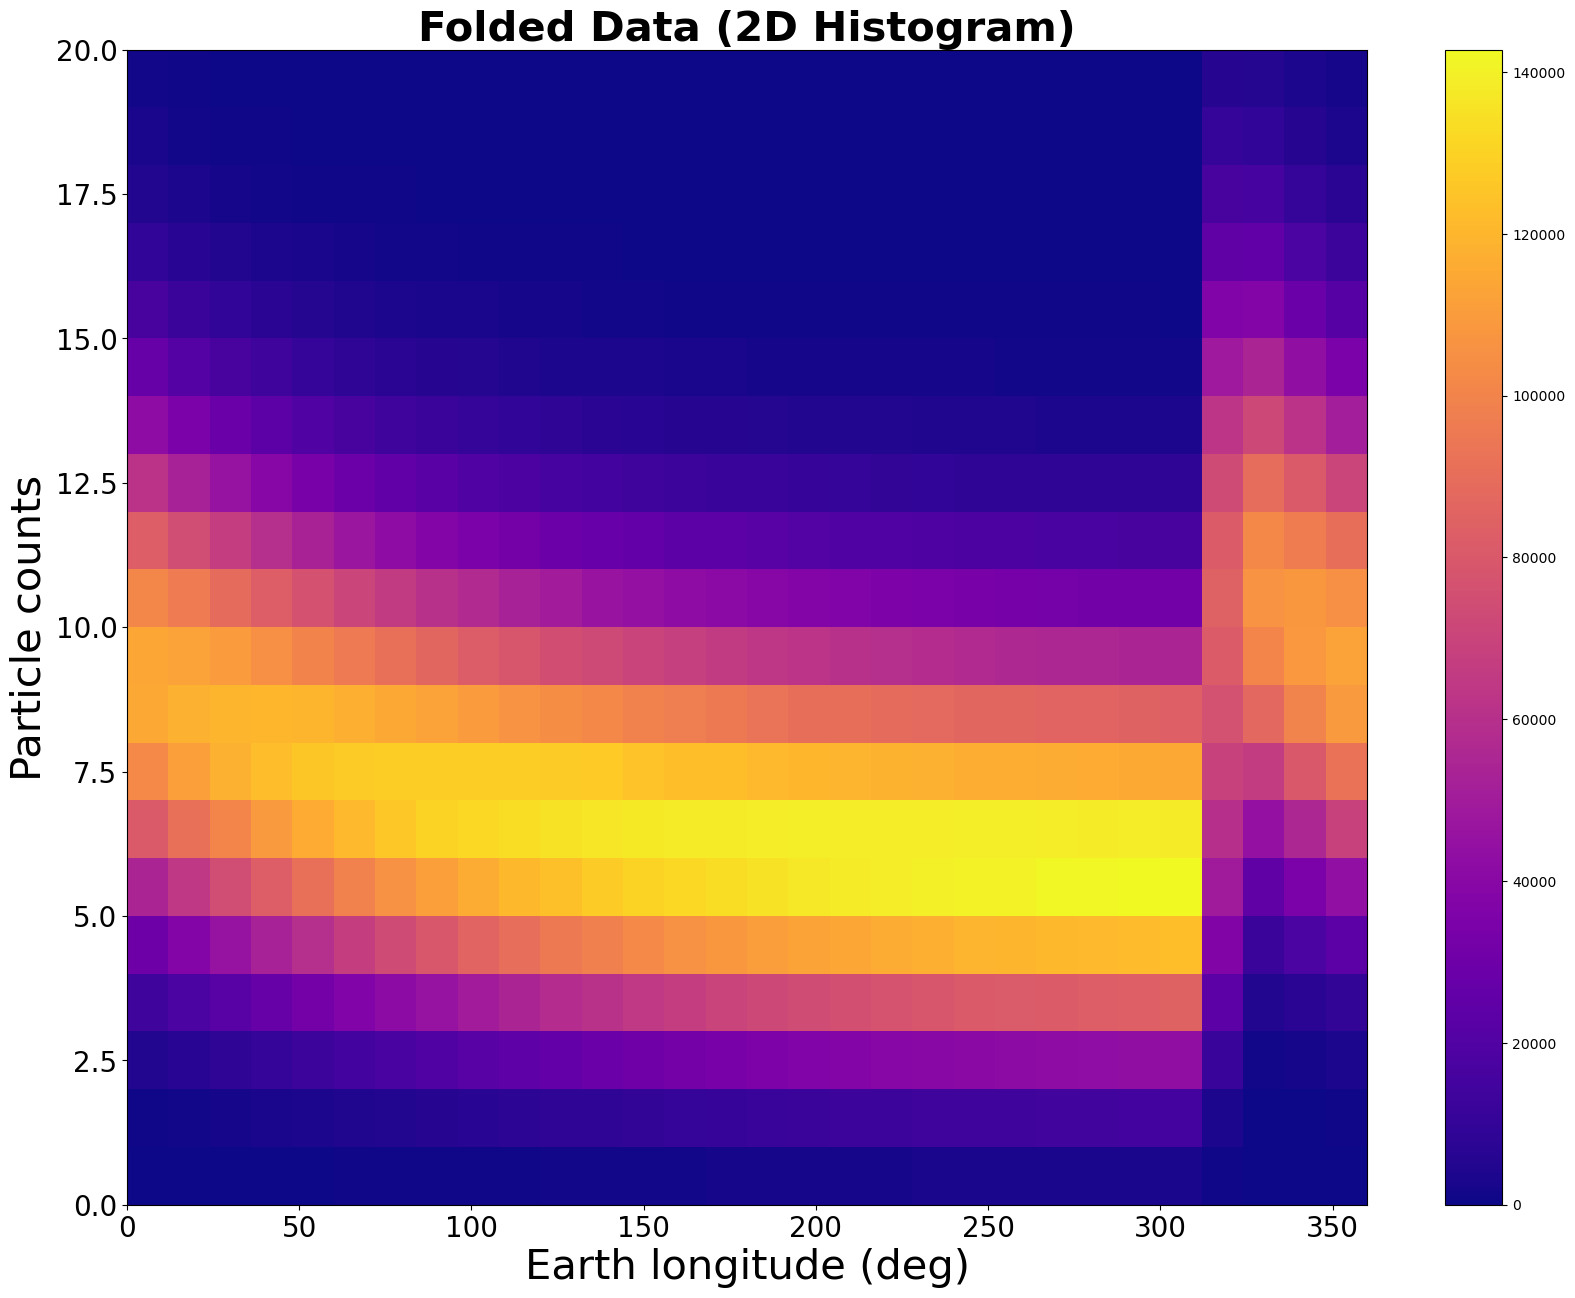

In [22]:
t = df['Earth longitude (deg)']
X = df['Particle counts']
fold = 360
bins = 30
start = 0
end = X.size
step = 1

plot_density(t, X, start, end, step, bins)

It is clear that the period varies with Earth Longitude. Since the background follows a Poisson distribution, we see that the mean (and peak - brigthest yellow in 2D hist plot) of the distribution varies as the satellite orbits the Earth. This pattern is repeated every orbital period (360 degrees Earth Longitude).

Moreover, the mean of this Poisson distribution seems to vary with exponential decay.

Thus, we have a Poisson distribution with a shift dependent on time. Then, we will find the mean of each bin vertically - and we need to know **how** the mean changes over time $\rightarrow$ we will look at longitude (which is dependent on time)

## 3)

Let's create a model for the background that includes time dependence and explicitly compare our model to the data. How good will our model of the background be?


We attempt applying the information we found above.

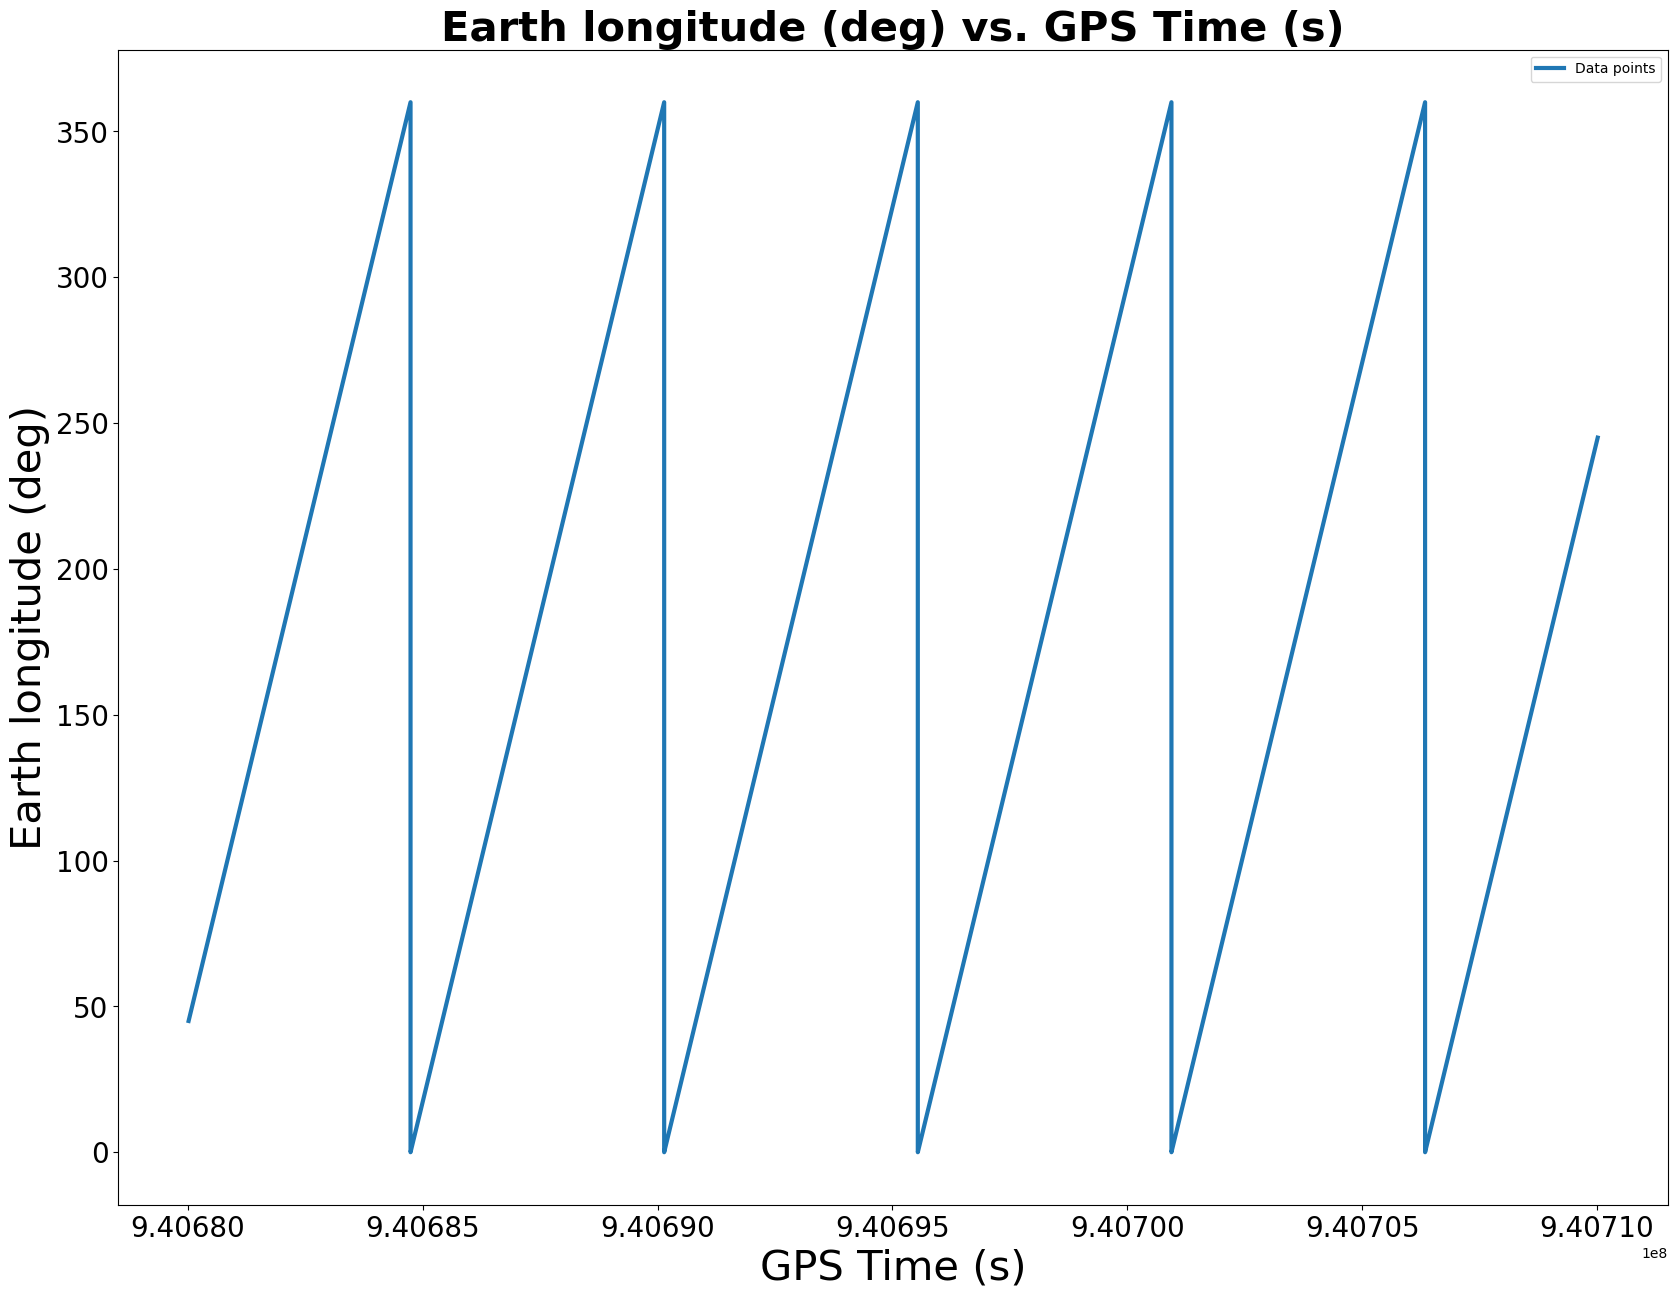

In [23]:
start,end,step = (0,300000,1)
X = df['GPS Time (s)']
Y = df['Earth longitude (deg)']
fsize = 30
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.plot(X[start:end:step], Y[start:end:step], label = 'Data points', linewidth = 3)
ax.set_xlabel(f'{X.name}', fontsize = fsize)
ax.set_ylabel(f'{Y.name}', fontsize = fsize)
ax.set_title(f'{Y.name} vs. {X.name}', fontsize = fsize, fontweight = 'bold')
ax.legend()
plt.show()

As we can see, the Earth Longitude varies periodically with a set time interval in GPS Time. Let's find the period in GPS Time by looking at when the Earth Longitude passes the 0 Meridian.

In [24]:
meridian = 0
df[df['Earth longitude (deg)']==meridian][:10].index

Int64Index([47250, 101250, 155250, 209250, 263250, 317250, 371250, 425250,
            479250, 533250],
           dtype='int64')

In [25]:
a = df[df['Earth longitude (deg)']==meridian][:10].index[0]
b = df[df['Earth longitude (deg)']==meridian][:10].index[1]
a,b

(47250, 101250)

In [26]:
orbit_interval = df['GPS Time (s)'][b] - df['GPS Time (s)'][a]
df['GPS Time (s)'][b], df['GPS Time (s)'][a], orbit_interval

(940690141.0, 940684741.0, 5400.0)

In [27]:
print(f'Thus our time interval the satellite spends during one Earth orbit is {orbit_interval} s.')

Thus our time interval the satellite spends during one Earth orbit is 5400.0 s.


In [28]:
seconds_from_start = (df['GPS Time (s)'] - df['GPS Time (s)'].iloc[0])
seconds_from_start

0                 0.0
1                 0.1
2                 0.2
3                 0.3
4                 0.4
              ...    
25919996    2591999.6
25919997    2591999.7
25919998    2591999.8
25919999    2591999.9
25920000    2592000.0
Name: GPS Time (s), Length: 25920001, dtype: float64

In [29]:
seconds_from_start[a], seconds_from_start[b]

(4725.0, 10125.0)

Seems like the mean varies between around a Particle Count of 11 and 6 over a time interval of 5400 s (shifted by 4725.0 s).

Now, back to our distribution. It needs to meet the above "boundary conditions".

$$ 11 \cdot p^t = a,b $$

$$ 11 \cdot p^0 = 11 $$

$$ 11 \cdot p^{5400} = 6 $$

$$ 11 \cdot p^{5400} = 6 $$

$$ p^{5400} = \frac{6}{11} $$

$$ 5400ln(p) = ln(\frac{6}{11}) $$

$$ p = e^{\frac{ln(\frac{6}{11})}{5400}} $$

$$ p = ln(\frac{6}{11 \cdot 5400}) = ln(\frac{6}{59400}) $$

In [30]:
p = np.exp(np.log(6/11)/5400)
p

0.9998877589284689

In [31]:
t1 = 0
t2 = 5400
11*(p**(t1)), 11*(p**(t2))

(11.0, 6.000000000000629)

Thus, our background pdf is

In [32]:
shift = -4050 # We estimate this shift to be about 4000
t = np.arange(0 + shift, 5400 + shift) % 5400
mean_array = 11*(p**(t))
x = np.linspace(0 + 4000,5400 + 4000,10000)

background = stats.poisson(mu=mean_array)

In [33]:
mean_array

array([9.45327575, 9.45221471, 9.45115378, ..., 9.4564596 , 9.4553982 ,
       9.45433692])

And the mean of the Poisson distribution follows this exponential decay: 

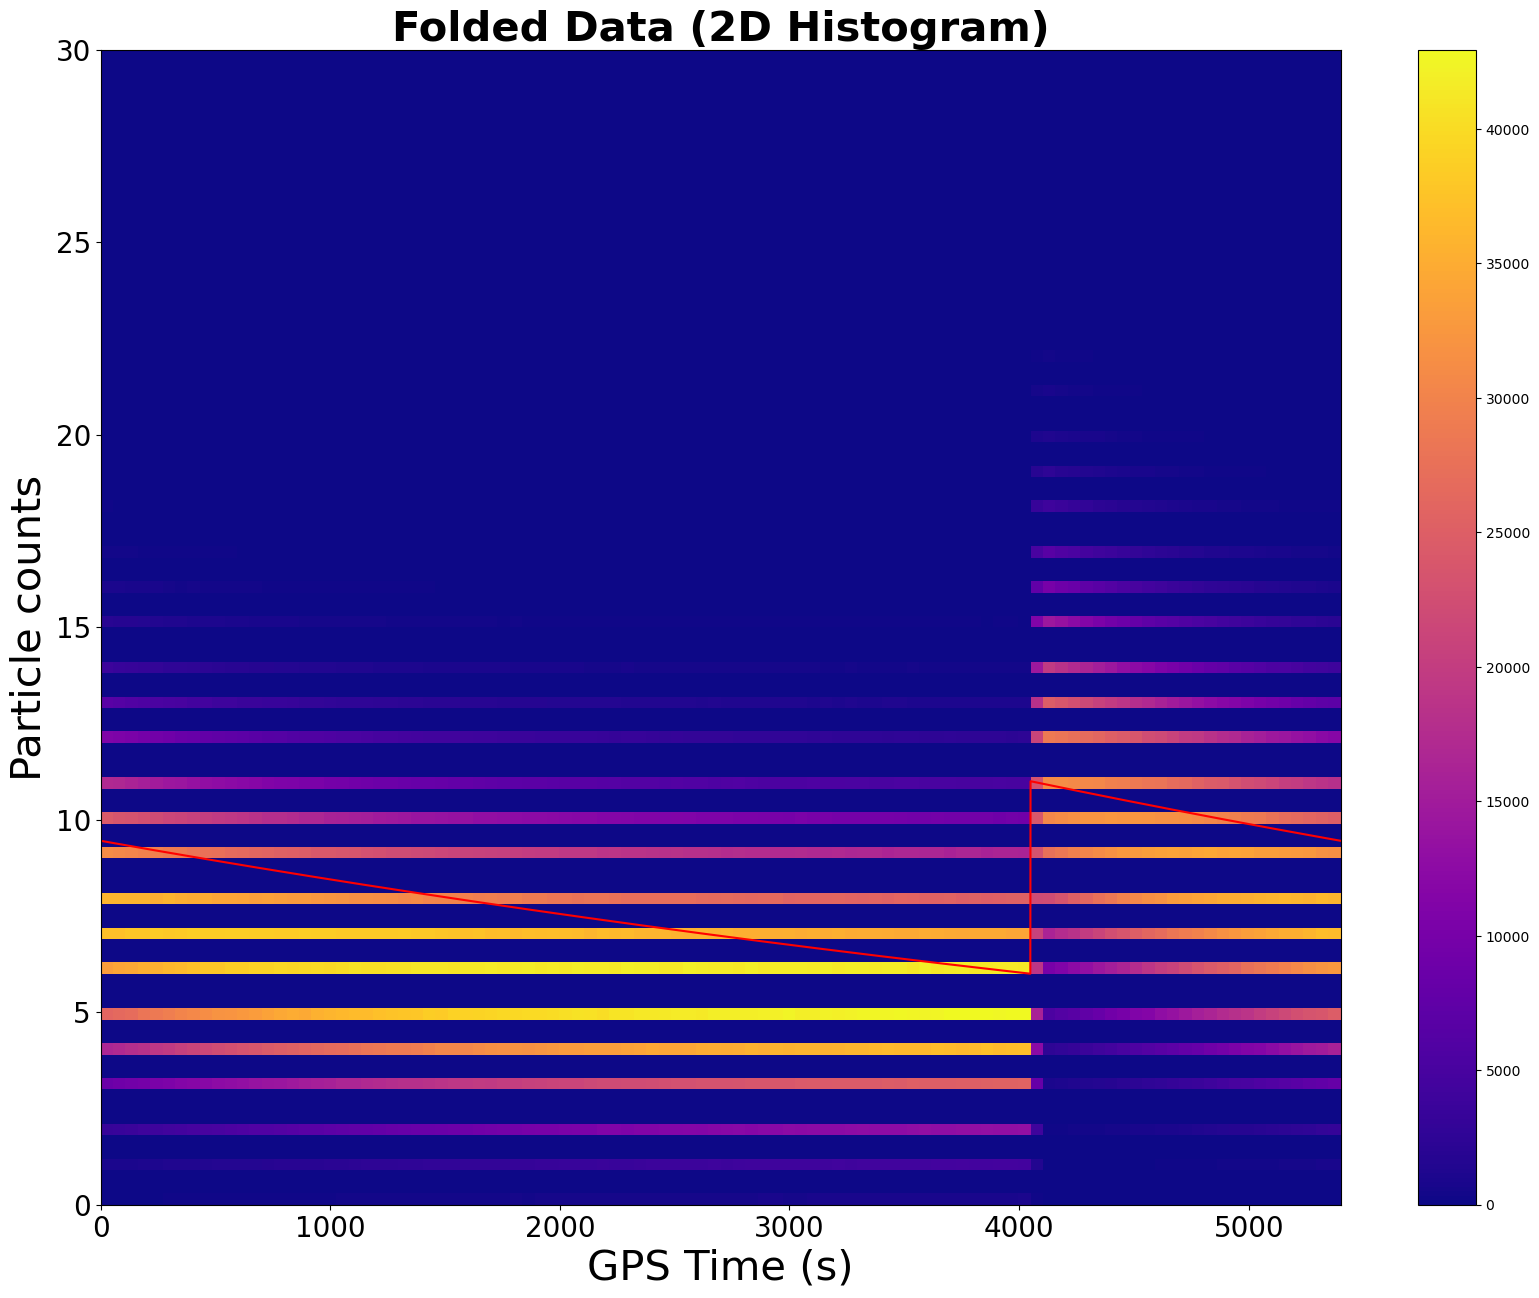

In [34]:
t = df['GPS Time (s)']
X = df['Particle counts']
fold = 5400
bins = 100

t_mod = t % fold

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
h = ax.hist2d(t_mod, X, bins, linewidth = 3, cmap='plasma')
ax.set_xlabel(f'{t.name}', fontsize = fsize)
ax.set_ylabel(f'{X.name}', fontsize = fsize)
ax.set_title('Folded Data (2D Histogram)', fontsize = fsize, fontweight = 'bold')
fig.colorbar(h[3], ax=ax)
ax.plot(mean_array, c='r')
plt.show()

In [35]:
frac = 45/360
5400 * frac

675.0

In [36]:
x = np.linspace(0,5400)
mean_array = 11*(p**(x))

background = stats.poisson(mu=mean_array)

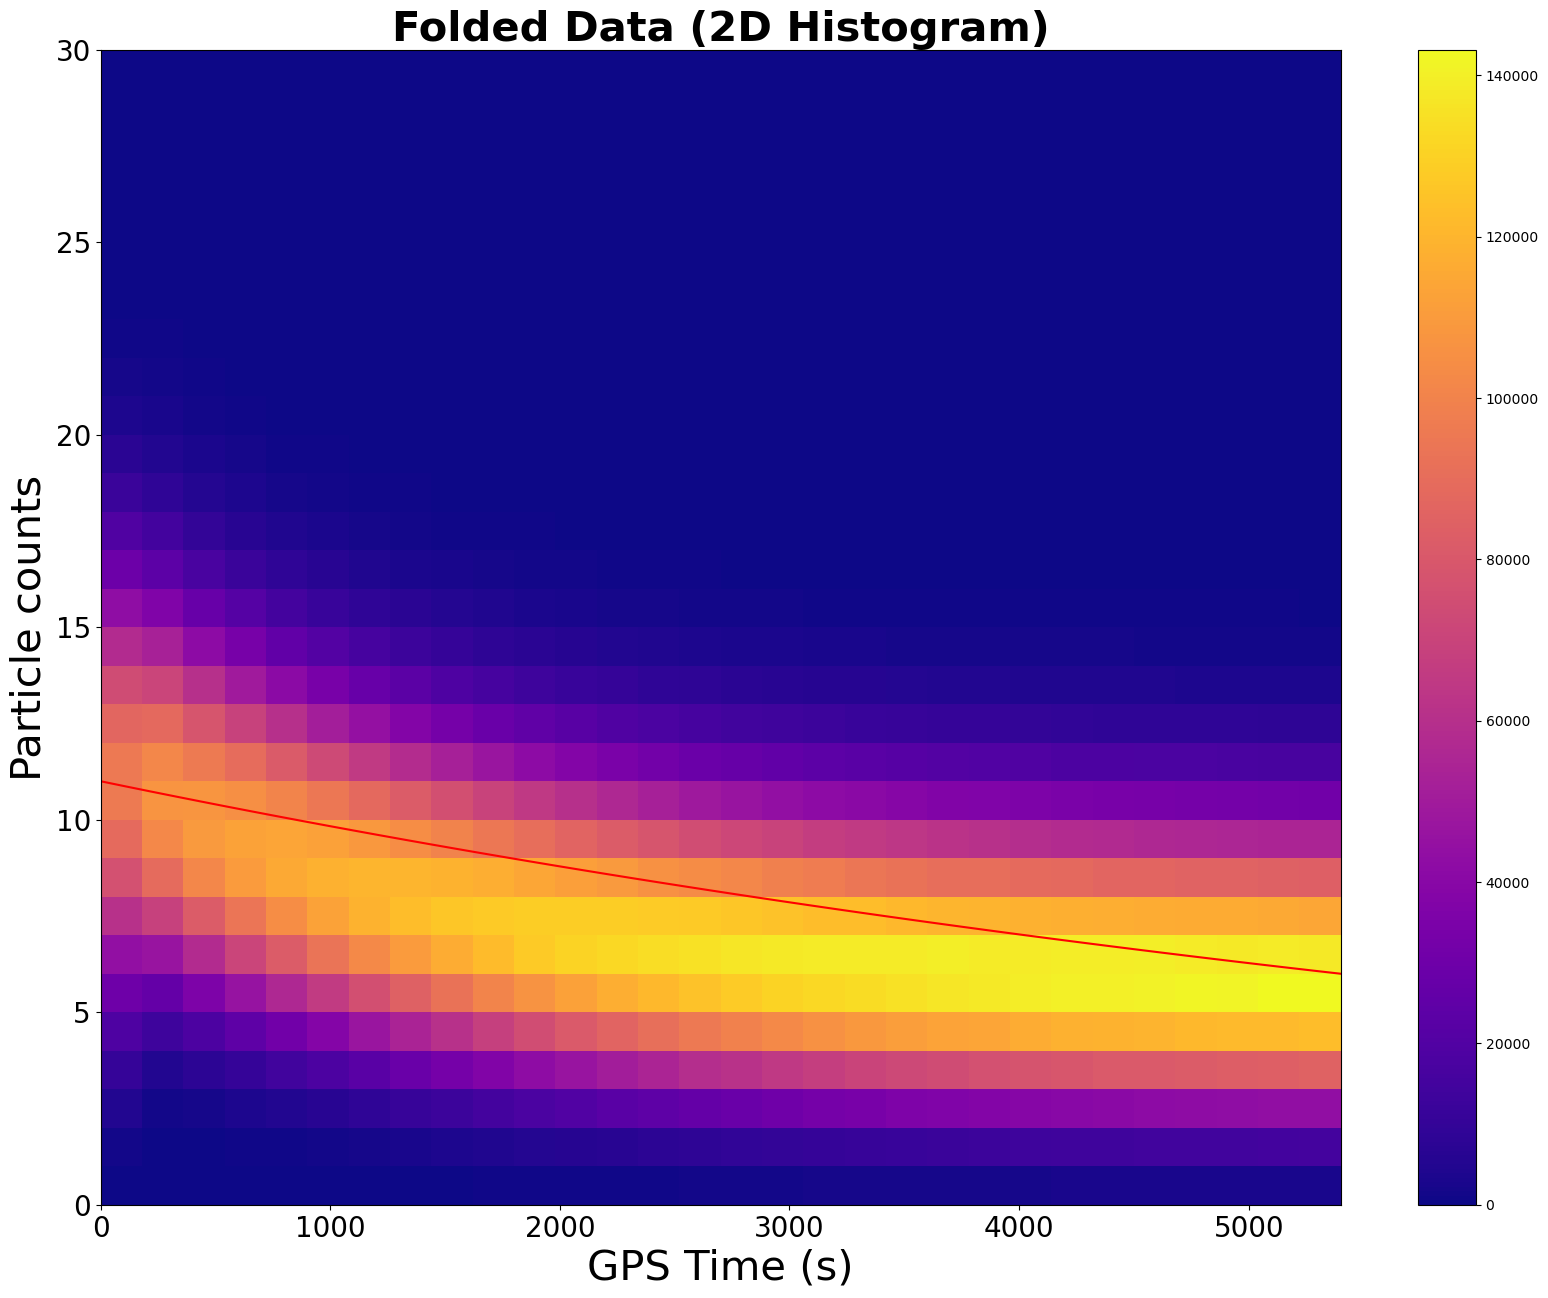

In [37]:
t = df['GPS Time (s)'] + shift
X = df['Particle counts']
fold = 5400
bins = 30
start = 0
end = X.size
step = 1

t_mod = t % fold

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
h = ax.hist2d(t_mod, X, bins, linewidth = 3, cmap='plasma')
ax.set_xlabel(f'{t.name}', fontsize = fsize)
ax.set_ylabel(f'{X.name}', fontsize = fsize)
ax.set_title('Folded Data (2D Histogram)', fontsize = fsize, fontweight = 'bold')
fig.colorbar(h[3], ax=ax)
ax.plot(x, mean_array, c='r')
plt.show()

As we can see, the background is not perfect and could possibly be adjusted further by adjusting the shape of the exponential decay.

We remind ourselves that the mean of our Poisson distribution is changing with the Earth Longitude and thus also with GPS time. It takes 5400 GPS seconds to complete one orbit, and there is some phase shift. Thus, we will use a $t'$ as our independent variable.

We can try a natural exponential instead and apply some 'floor' to this function (since the mean seems to follow an exponential until it hits a floor):

If $\lambda$ is our Poisson distribution's mean, we have $ P(k, \lambda(t')) = \frac{\lambda(t') e^{-\lambda (t')}}{k!} $

and the mean is given by $ \lambda (t') = a e^{-b t'} + c $ and we need to fit the mean to the above 2D-histogram by finding a correct $a$ and $b$. $b$ is our floor.

In [60]:
b = np.log(11 - c)
b

1.7047480922384253

In [74]:
# These parameters could also have been found using a fitting program, but was found here using educated guesses about the parameters

a = 5.5
b = 0.0008
c = 5.5

t_prime = np.linspace(0,5400)
mean_array = a * np.exp(-b*(t_prime)) + c

background = stats.poisson(mu=mean_array)

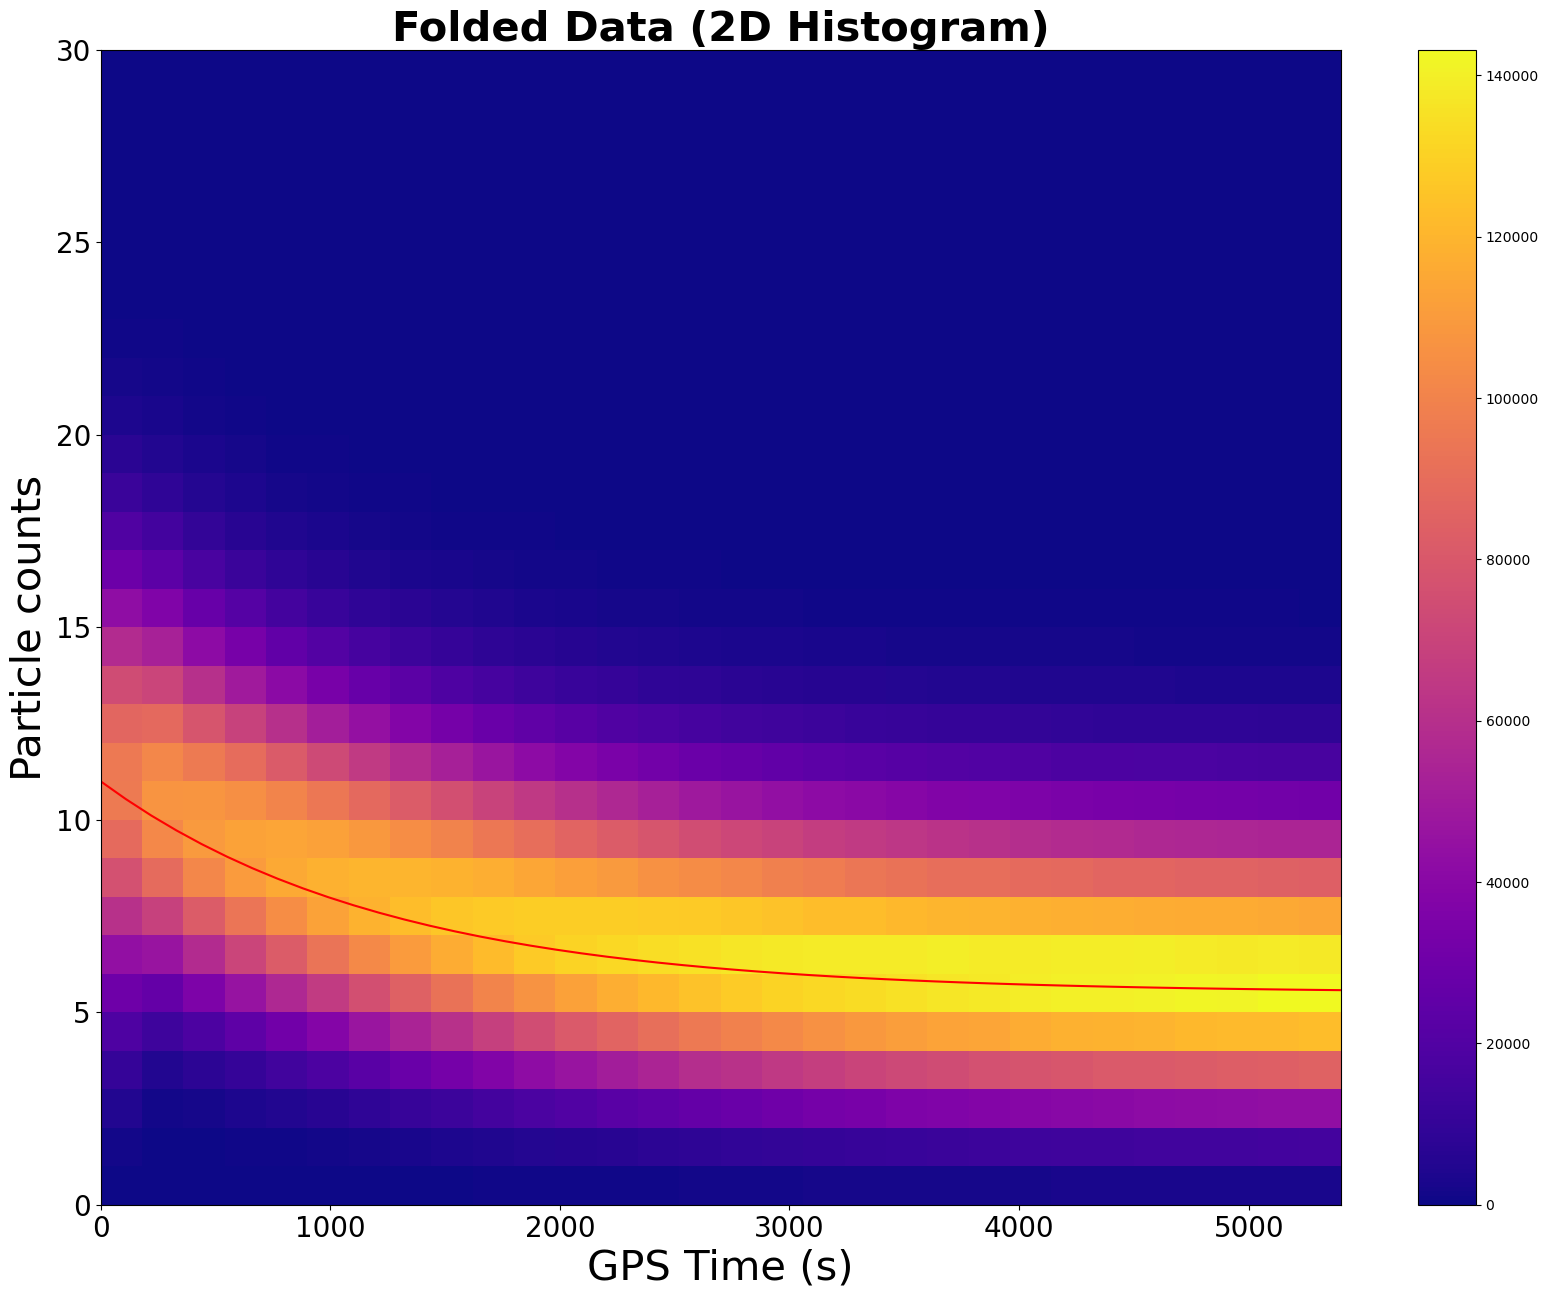

In [75]:
t = df['GPS Time (s)'] + shift
X = df['Particle counts']
fold = 5400
bins = 30
start = 0
end = X.size
step = 1

t_mod = t % fold

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
h = ax.hist2d(t_mod, X, bins, linewidth = 3, cmap='plasma')
ax.set_xlabel(f'{t.name}', fontsize = fsize)
ax.set_ylabel(f'{X.name}', fontsize = fsize)
ax.set_title('Folded Data (2D Histogram)', fontsize = fsize, fontweight = 'bold')
fig.colorbar(h[3], ax=ax)
ax.plot(t_prime, mean_array, c='r')
plt.show()

## 4)

Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

Optional: while this is simulated data, it is based on a real effect seen by low Earth orbit satellites. Can you identify the cause of the variable background and propose a physical model?

Since our background varies, so will the discovery threshold. The 5 sigma threshold (for for example a 100 millisecond GRB) at different times is:

In [36]:
sigma = 5
prob = stats.norm.sf(sigma)
prob

2.866515718791933e-07

At time $t=0$:

In [37]:
time1 = 0
threshold1 = stats.poisson.ppf(stats.norm.cdf(5), mu=mean_array[time1])
threshold1

28.0

At time $t=3000$:

In [38]:
time2 = 3000
threshold2 = stats.poisson.ppf(stats.norm.cdf(5), mu=mean_array[time2])
threshold2

23.0

In [39]:
print(f'So at time={time1}s the 5-sigma threshold is {threshold1} cosmic rays and at time={time2}s the threshold is {threshold2} cosmic rays.')

So at time=0s the 5-sigma threshold is 28.0 cosmic rays and at time=3000s the threshold is 23.0 cosmic rays.


This varying background may be due to the satellite being exposed periodically to the sun or the moon as it orbits the Earth.

## Problem 2

In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, each with transients (something like a super nova that only appears in one image) and faint stars. We will be looking for transients.

## 1)

We dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.


In [40]:
hf = h5py.File('images.h5', 'r')

In [41]:
hf.keys()

<KeysViewHDF5 ['image1', 'imagestack']>

In [42]:
image1 = np.array(hf.get('image1'))
imagestack = np.array(hf.get('imagestack'))

In [43]:
hf['image1'], hf['imagestack']

(<HDF5 dataset "image1": shape (200, 200), type "<f8">,
 <HDF5 dataset "imagestack": shape (200, 200, 10), type "<f8">)

In [44]:
image1[:,0]

array([-1.24711126,  0.09727501,  0.33900351,  0.29558254,  1.91368599,
        0.07626013,  0.03986838, -0.25576938, -0.22294167, -0.65113439,
       -0.01398361,  0.70831161, -0.09705982, -0.30476611, -0.47555002,
        0.29868733, -0.35539496, -0.12378233, -0.40464966,  0.07679724,
       -0.25425321,  0.03919398, -0.54560791, -0.26625077,  0.07074571,
       -0.13175857, -0.18360689, -0.14991885, -0.29985518,  1.37532486,
       -0.19475698, -0.36960906,  0.48550722, -0.67534756, -0.64634097,
        0.88276573, -0.16895827, -0.42872912, -0.02869665,  0.43524321,
        0.24346419,  1.10485685, -0.33400717,  0.51251083,  0.90152251,
        0.92508949, -0.83172978,  0.45036765,  1.16175577, -0.80162552,
       -0.36378374,  0.48153328, -0.32109448,  0.14591758,  0.77390384,
        0.11669285,  0.5746037 ,  0.27299184,  0.4348156 , -0.15030213,
        0.05540169,  0.38094349,  0.6311626 ,  0.19981589,  0.63349839,
        0.43168284,  0.09893955, -0.85494294,  0.93242997,  0.37

You can then close your file

In [45]:
hf.close()

## 2)

Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

We then explore the data to see if there is signal contamination, if the background is time-dependent or if it is constistent spatially.

We will eventually calculate a background $pdf()$.

In [46]:
print(image1.shape)

(200, 200)


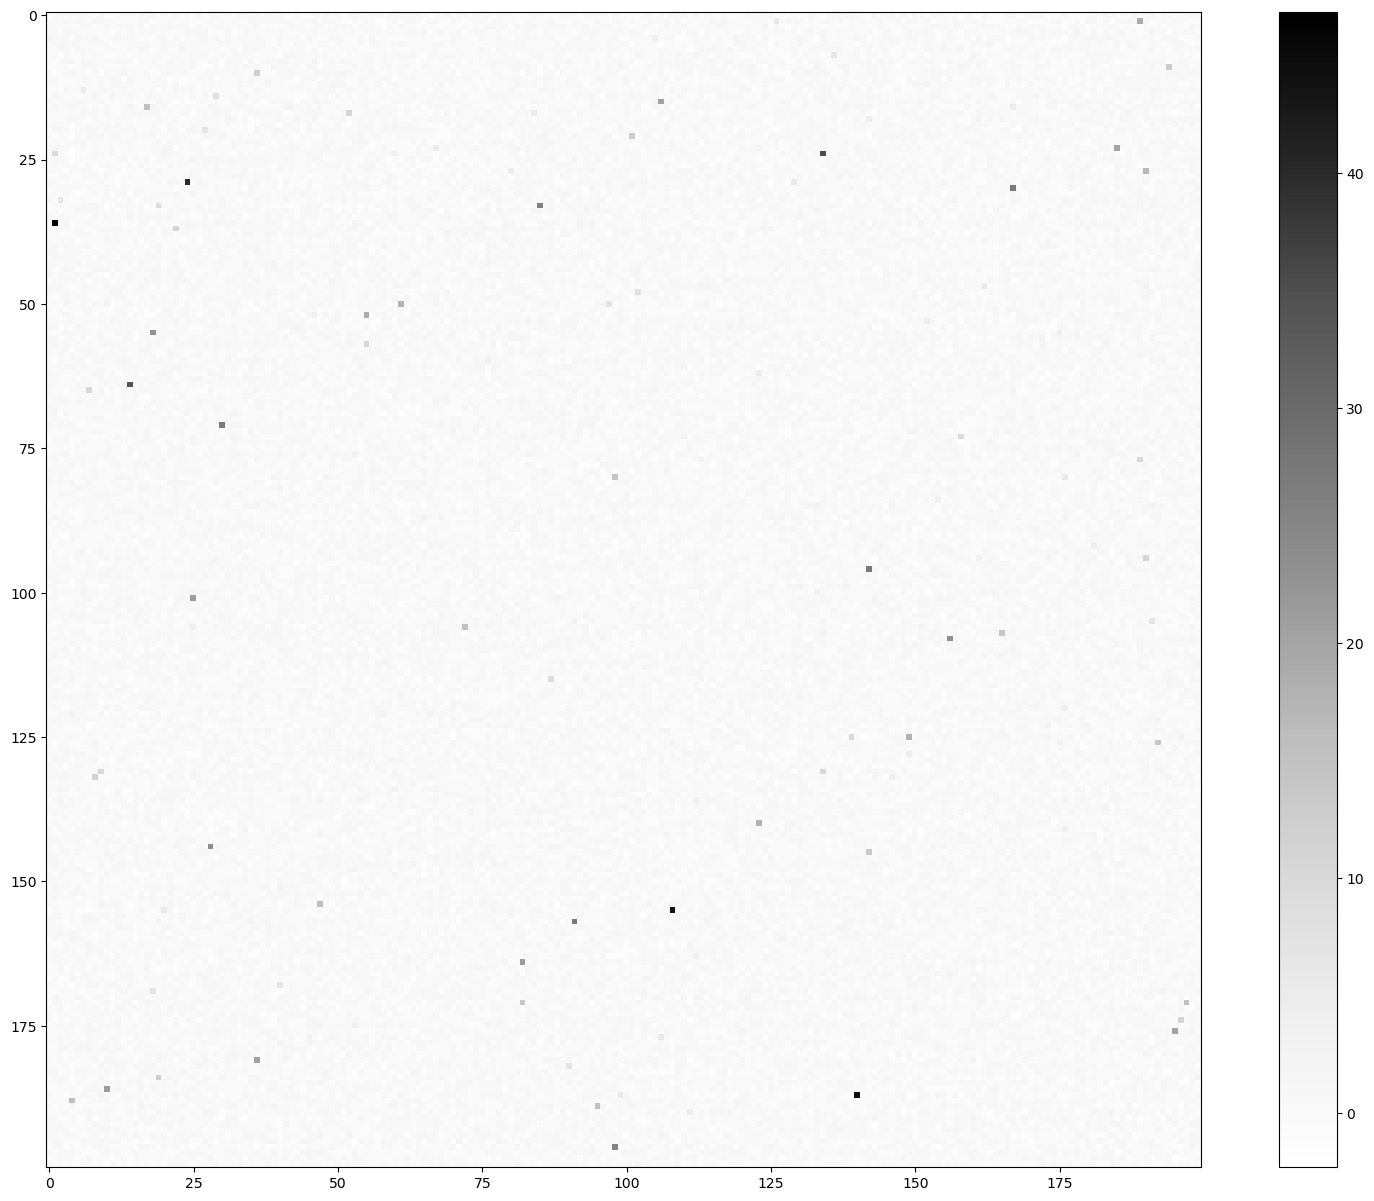

In [47]:
plt.imshow(image1, cmap='Greys')
plt.colorbar()

We can access for example image#5 in the imagestack like this:

In [48]:
plt.rcParams["figure.figsize"] = (6,6)

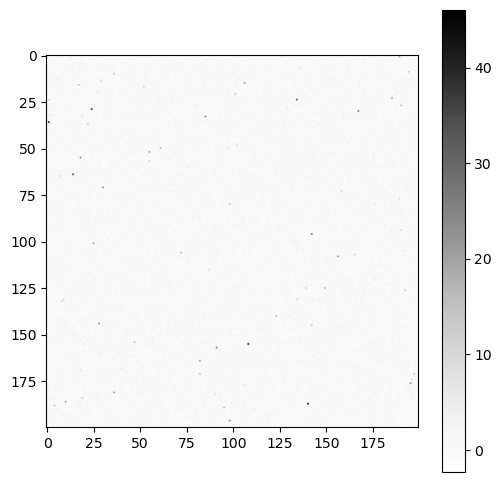

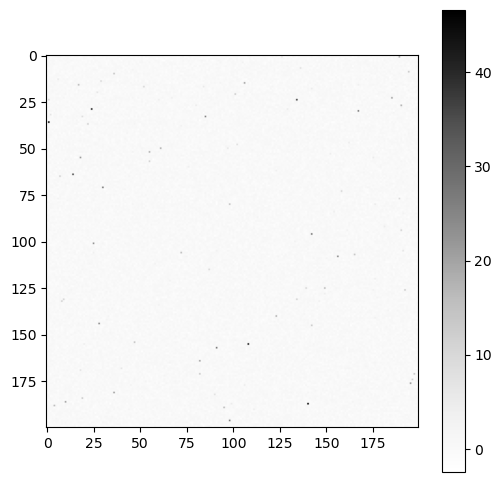

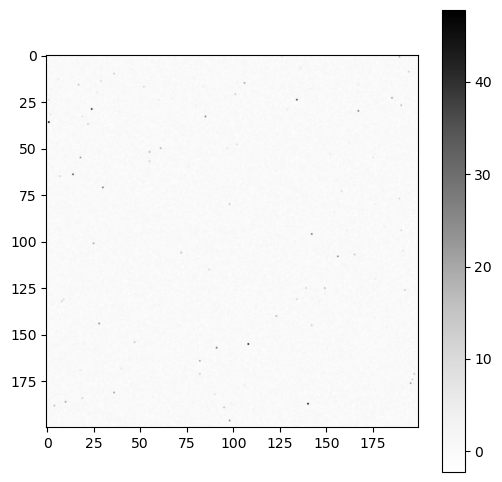

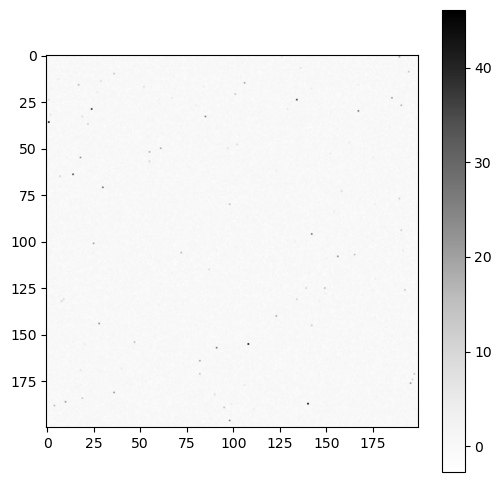

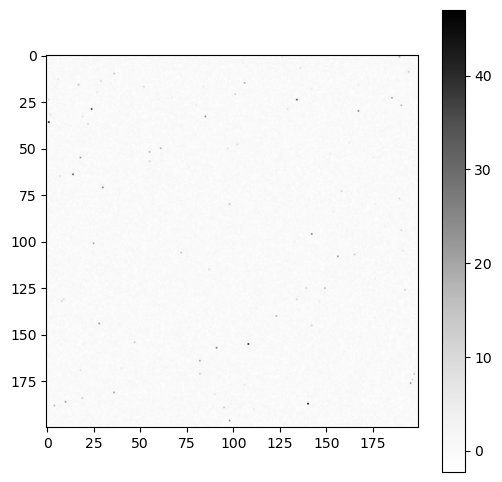

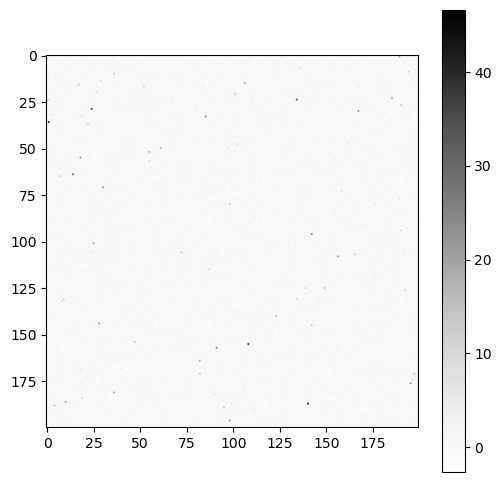

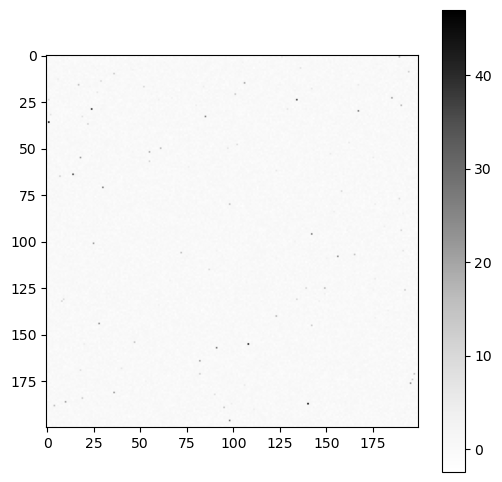

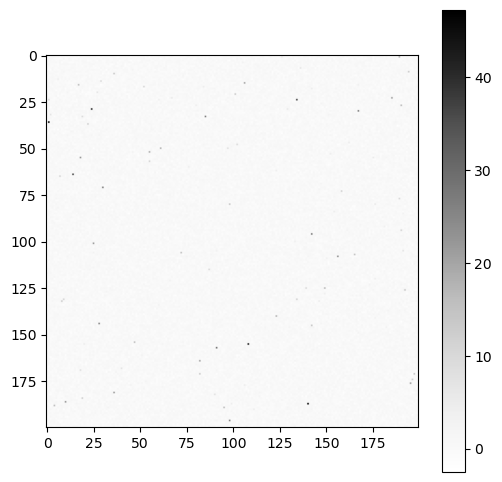

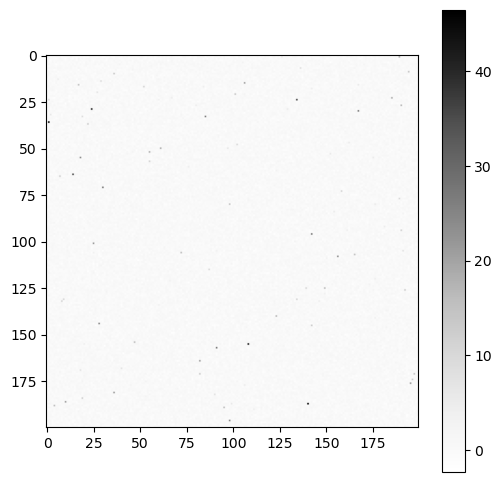

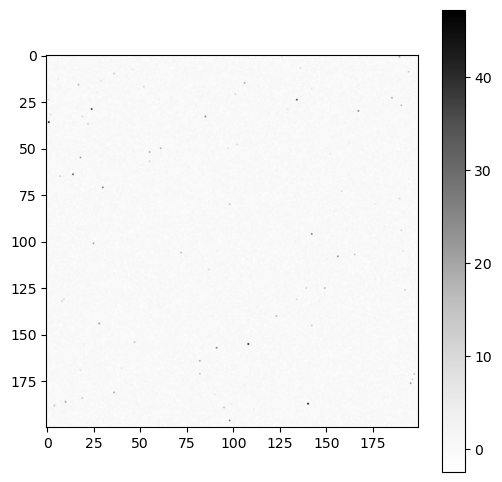

In [49]:
for imagenumber in range(0,10):
    plt.imshow(imagestack[:,:,imagenumber], cmap='Greys')
    plt.colorbar()
    plt.show()

There is most definitely a source of background noise, the faint stars that appear as faint gray dots in the background of the darker black dots.

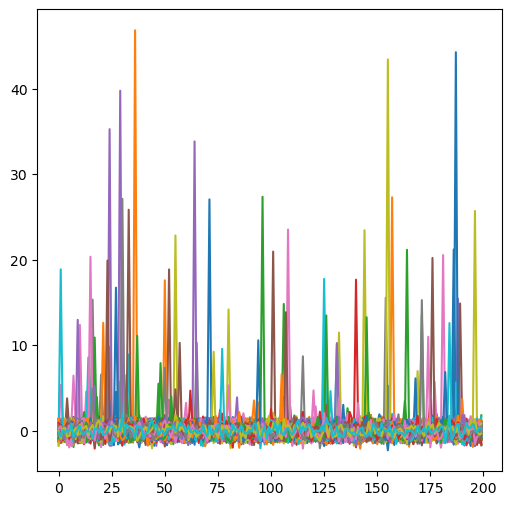

In [50]:
plt.plot(image1);

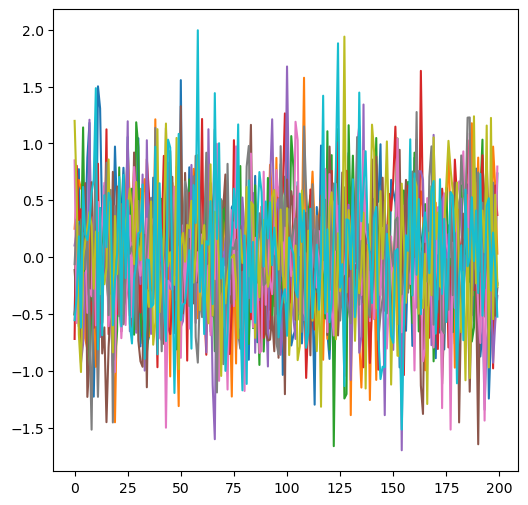

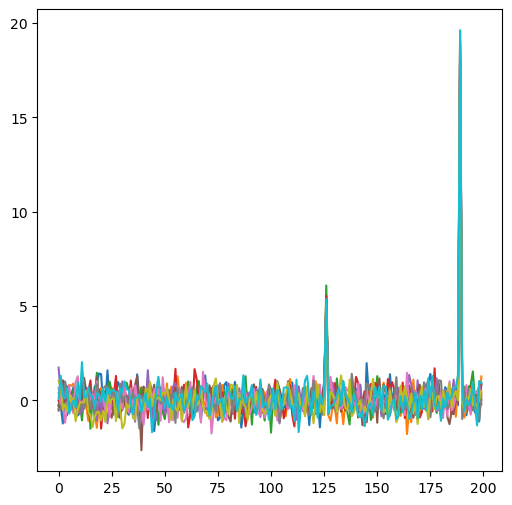

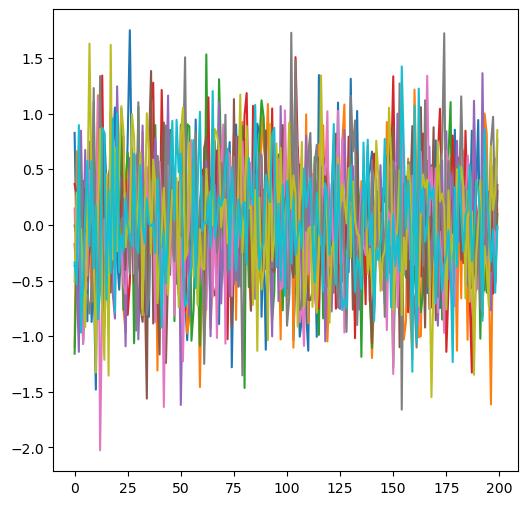

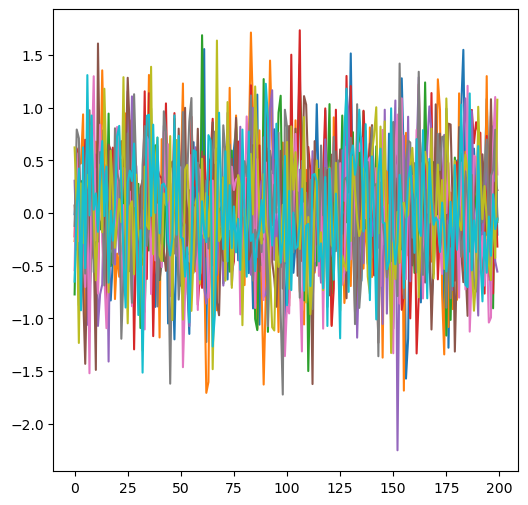

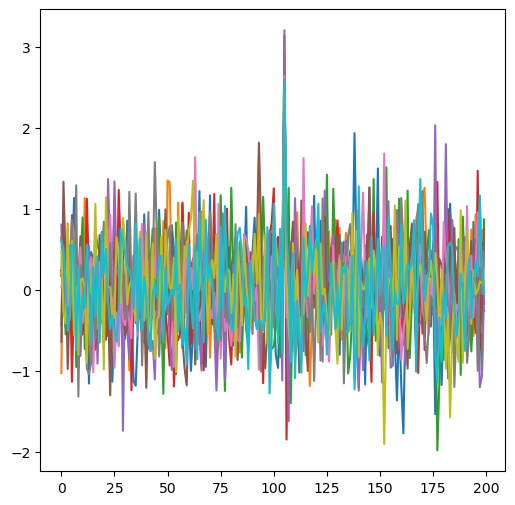

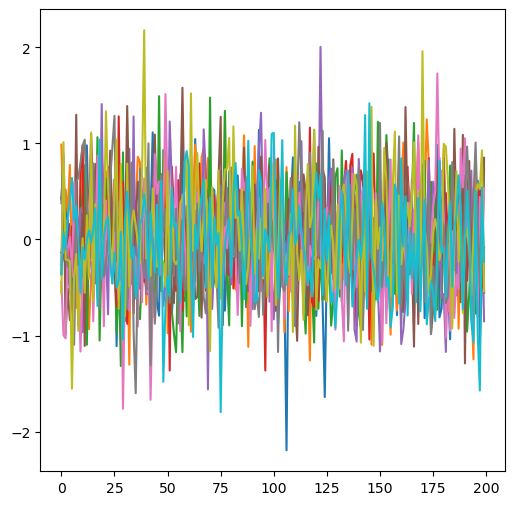

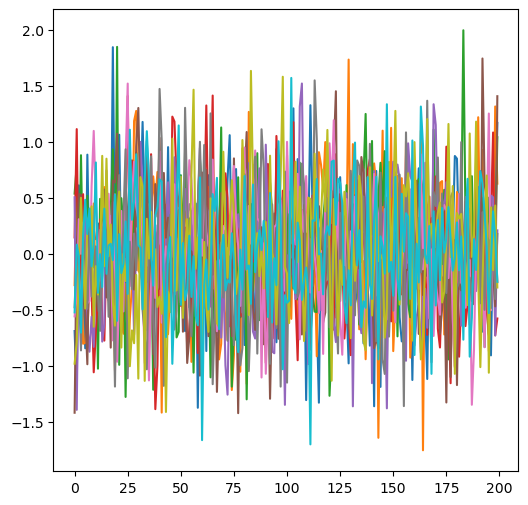

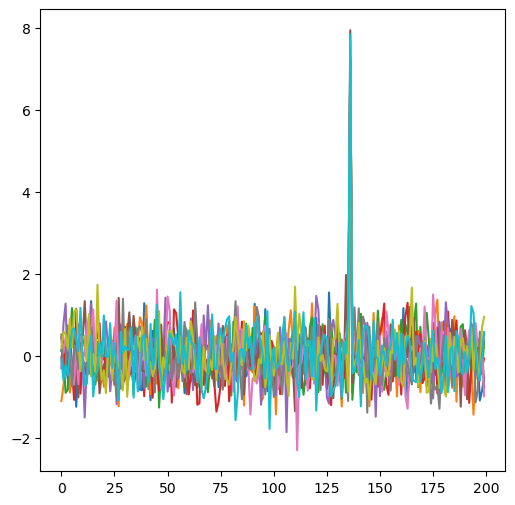

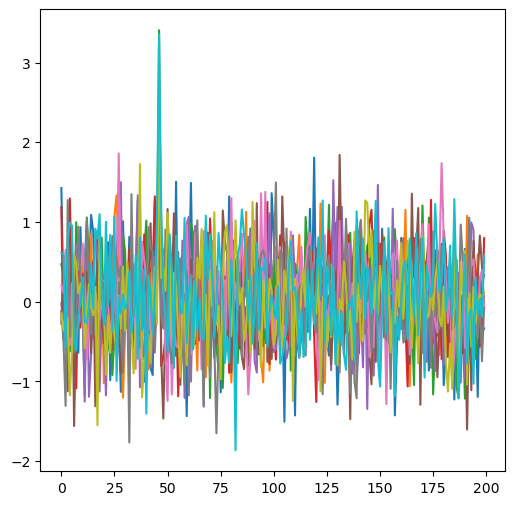

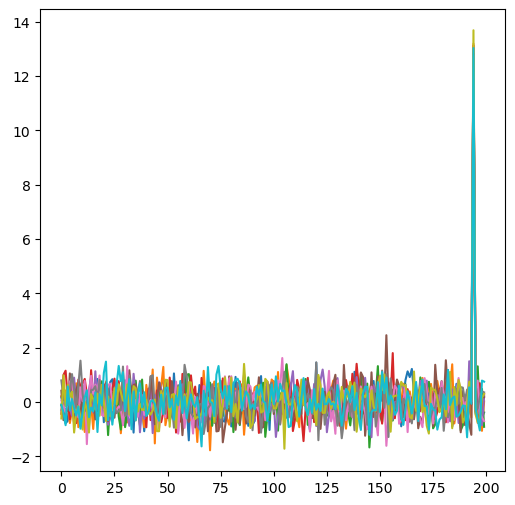

In [51]:
for imagenumber in range(0,10):
    plt.plot(imagestack[imagenumber]);
    plt.show()

Again, here we easily see that some of the images have clear signal detections (transients) in the form of spikes while others have more background noise. So what does our noise profile look like?

We're looking at intensity vs. counts of pixels with that intensity $\rightarrow$ Essentially the distribution of intensity over the CCD.

In [52]:
flat_list = []
for sublist in image1:
    for item in sublist:
        flat_list.append(item)

In [53]:
min(flat_list), max(flat_list)

(-2.3061570283216652, 46.84317561571535)

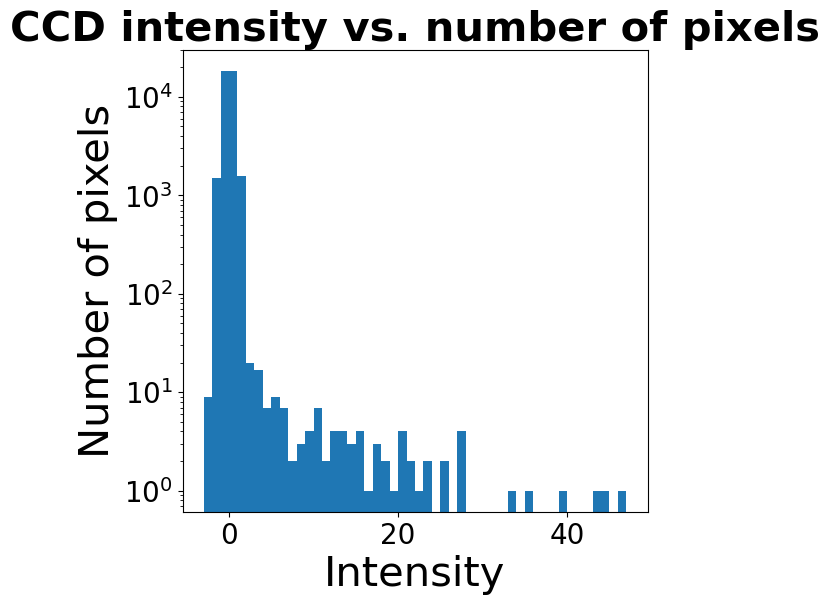

In [54]:
bins = np.arange(np.floor(min(flat_list)), np.ceil(max(flat_list)+1))

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
plt.show()

Maybe this hints of a Gaussian distribution?

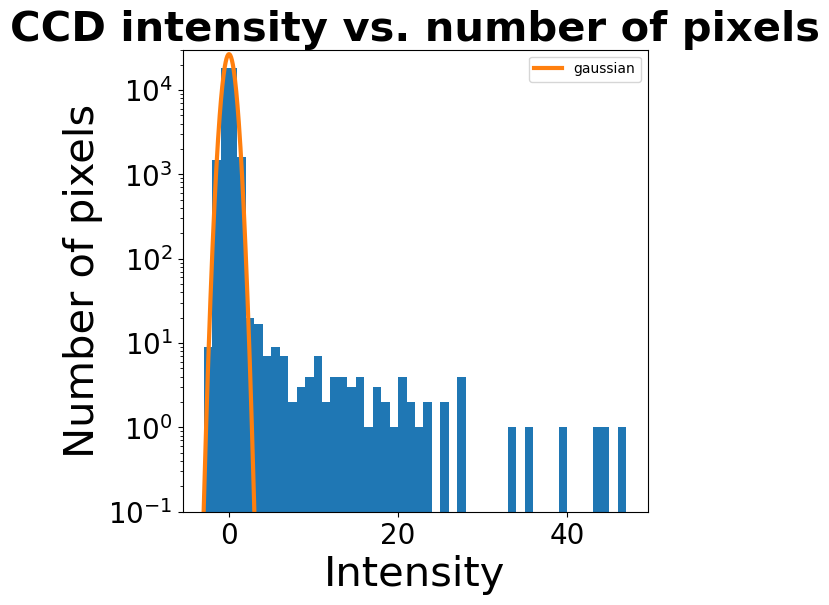

In [55]:
background = stats.norm(loc=0, scale=0.6)
x = np.linspace(-3, 47, 1000)


fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*4e4, linewidth = 3, label = 'gaussian')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e4])
ax.legend()
plt.show()

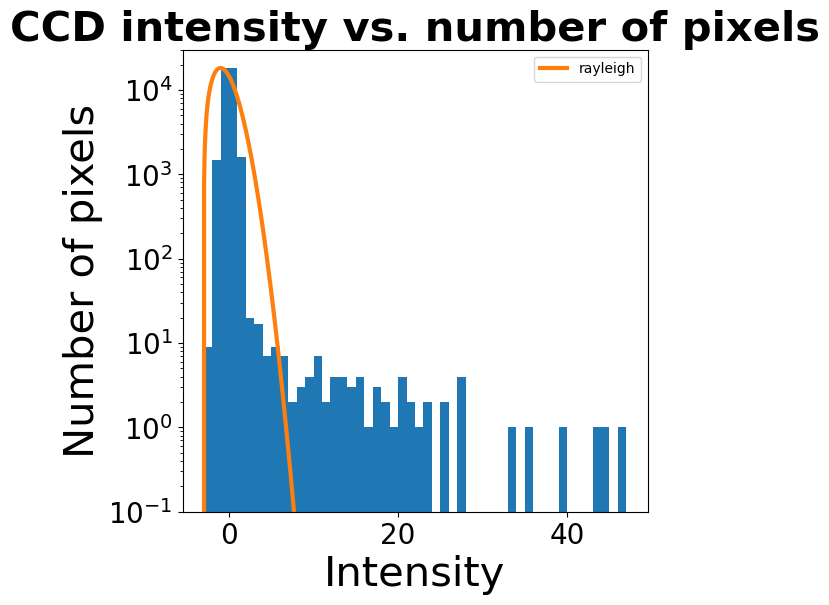

In [56]:
background = stats.rayleigh(loc=-3, scale=2)
x = np.linspace(-3, 47, 1000)


fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*6e4, linewidth = 3, label = 'rayleigh')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e4])
ax.legend()
plt.show()

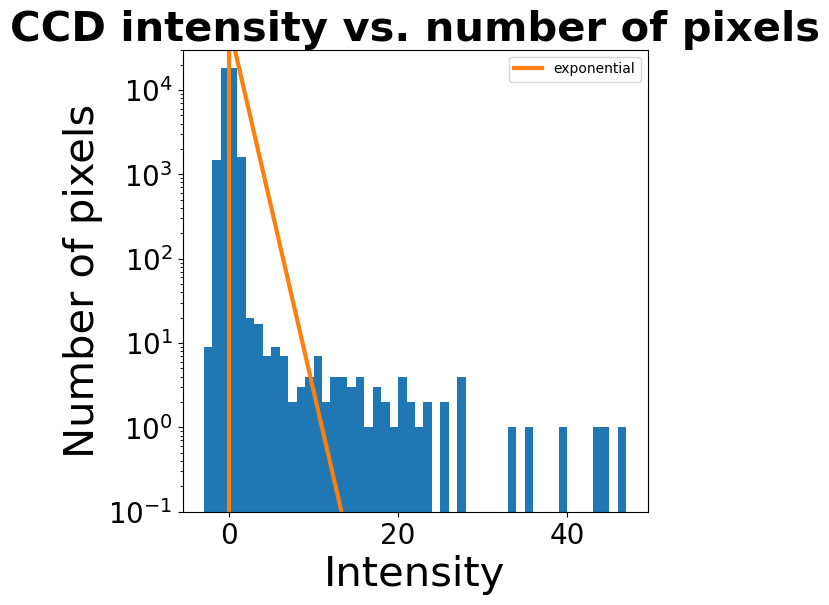

In [57]:
background = stats.expon(loc=0, scale=1)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*6e4, linewidth = 3, label='exponential')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e4])
ax.legend()
plt.show()

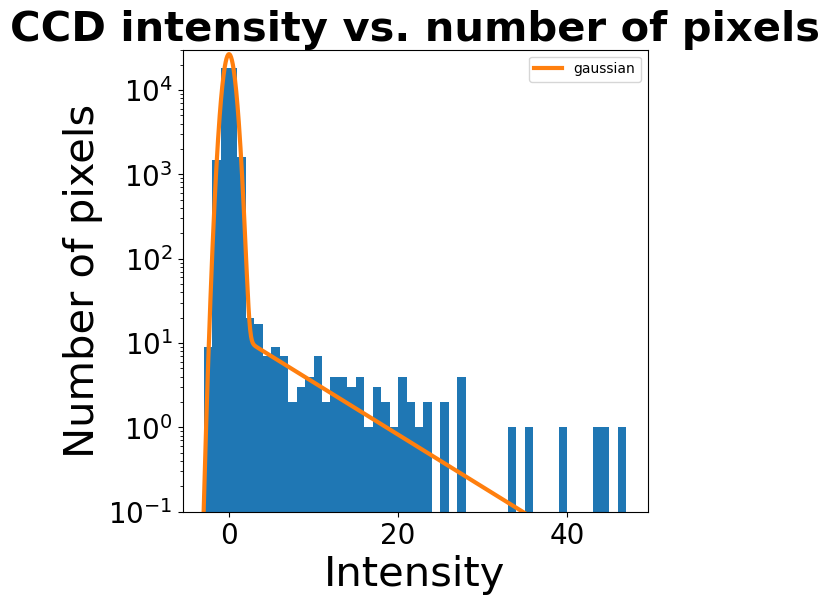

In [58]:
gaussian = stats.norm(loc=0, scale=0.6)
exponential = stats.expon(loc=0, scale=7)

x = np.linspace(-3, 47, 1000)


fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, gaussian.pdf(x)*4e4 + exponential.pdf(x)*1e2, linewidth = 3, label = 'gaussian')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e4])
ax.legend()
plt.show()

From above, it seems like the Gaussian distribution is our best bet.

In [59]:
bins

array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
       10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.])

We try again using the imagestack.

In [60]:
flat_list = []
for sublist in imagestack[0]:
    for item in sublist:
        flat_list.append(item)

In [61]:
min(flat_list), max(flat_list)

(-1.6994599247013218, 1.9955820607564105)

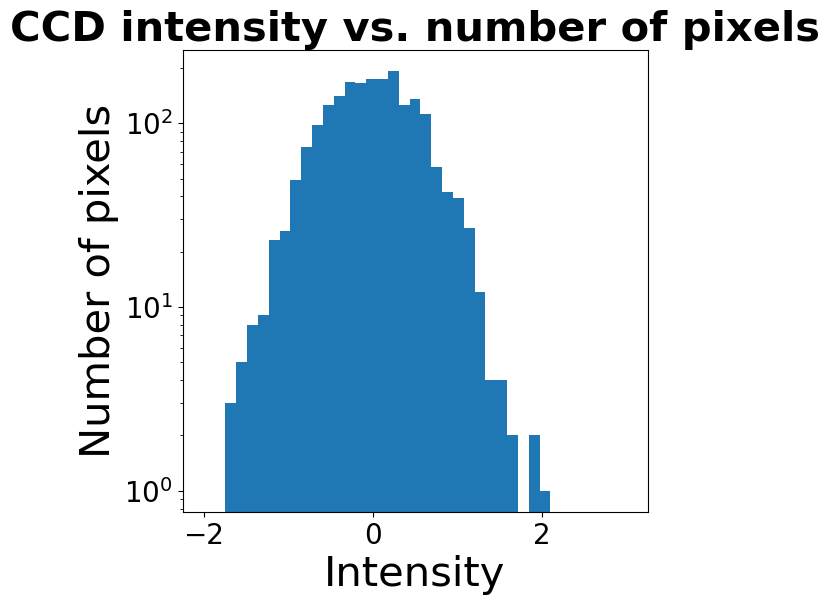

In [62]:
bins = np.linspace(np.floor(min(flat_list)), np.ceil(max(flat_list)+1), 40)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
plt.show()

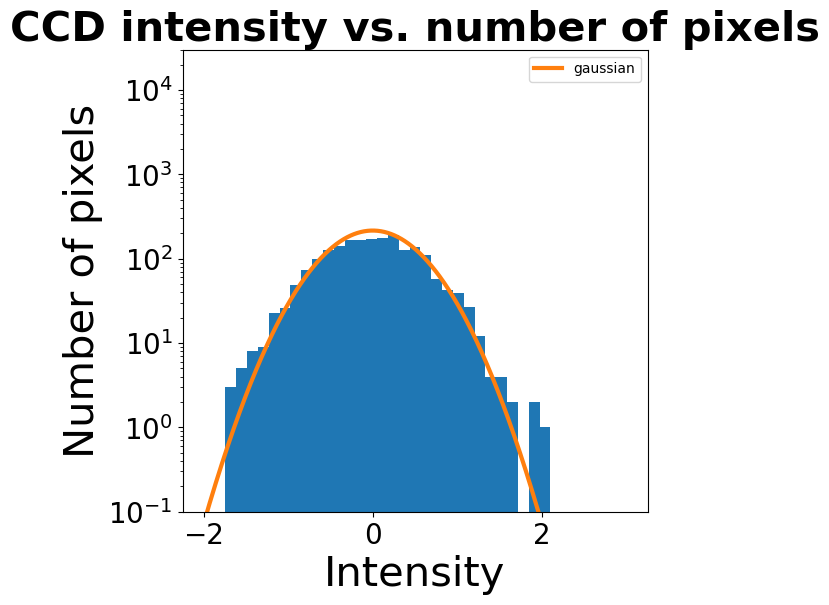

In [63]:
background = stats.norm(loc=0, scale=0.5)
x = np.linspace(-2, 2, 1000)


fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*2.7e2, linewidth = 3, label = 'gaussian')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e4])
ax.legend()
plt.show()

Seems like we can fit Gaussians to the background in each of these images in the imagestack.

In [64]:
flat_list = []
for sublist in imagestack[1]:
    for item in sublist:
        flat_list.append(item)

In [65]:
min(flat_list), max(flat_list)

(-2.6496072842241567, 19.617172182653647)

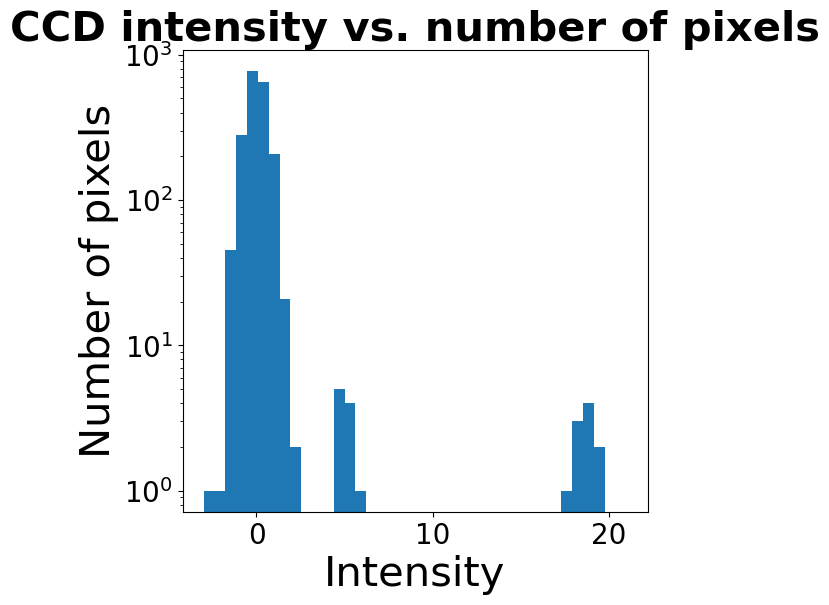

In [66]:
bins = np.linspace(np.floor(min(flat_list)), np.ceil(max(flat_list)+1), 40)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
plt.show()

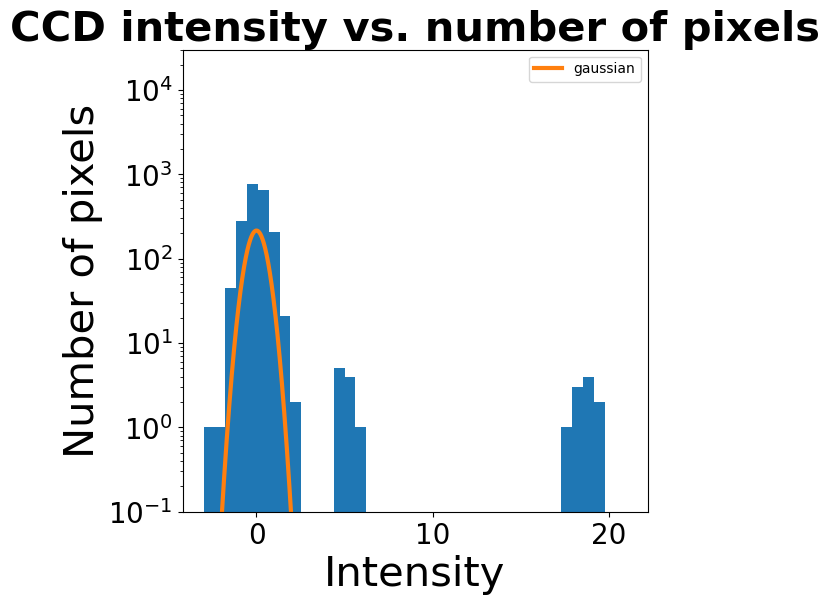

In [67]:
background = stats.norm(loc=0, scale=0.5)
x = np.linspace(-2, 2, 1000)


fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*2.7e2, linewidth = 3, label = 'gaussian')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('CCD intensity vs. number of pixels', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e4])
ax.legend()
plt.show()

The above plots were included to show my thought process in how I arrived at interpreting the background pdf().

Let's try to use all images in the imagestack by adding all the intensities of the images in the imagestack to find our background.

In [68]:
num_images = 10

flat_list = []
for i in range(0,num_images):
    for sublist in imagestack[i]:
        for item in sublist:
            flat_list.append(item)

In [69]:
min(flat_list), max(flat_list)

(-2.6496072842241567, 19.617172182653647)

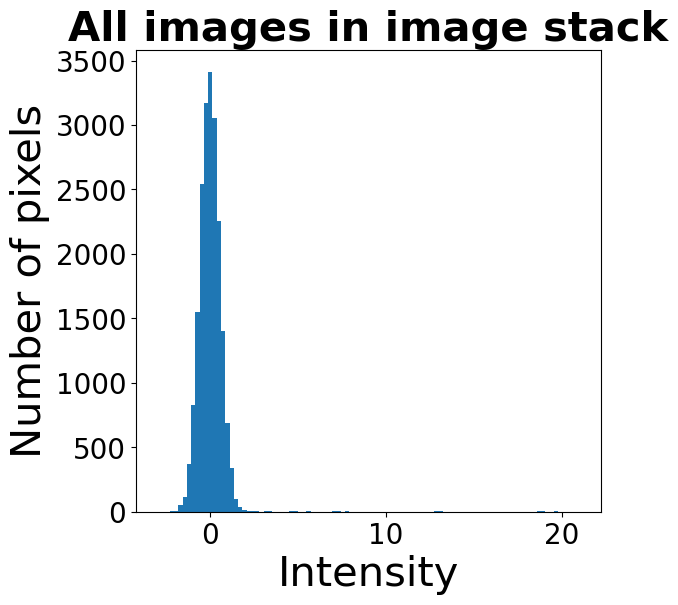

In [70]:
bins = np.linspace(np.floor(min(flat_list)), np.ceil(max(flat_list)+1), 100)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('All images in image stack', fontsize = fsize, fontweight = 'bold')
plt.show()

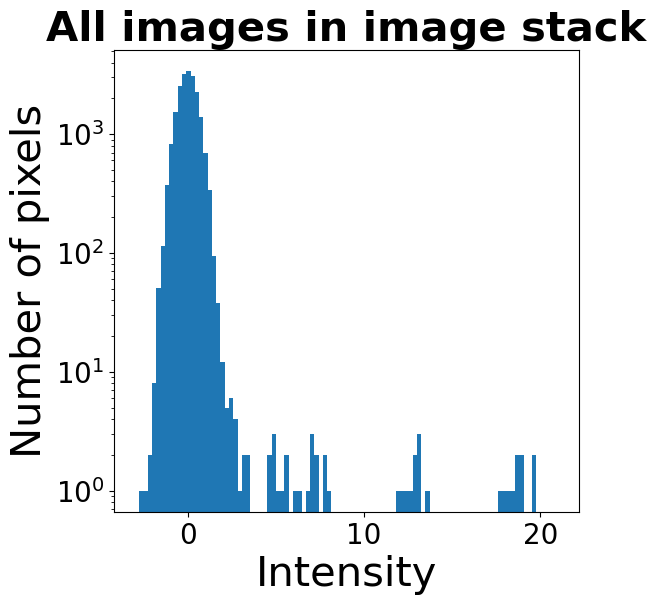

In [71]:
bins = np.linspace(np.floor(min(flat_list)), np.ceil(max(flat_list)+1), 100)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('All images in image stack', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
plt.show()

It seems like we have to use the flatten method to get all the intensities of the background.

In [72]:
imlist = imagestack.flatten()
flat_list = imlist
min(flat_list), max(flat_list)

(-2.709336827866645, 47.79010819628649)

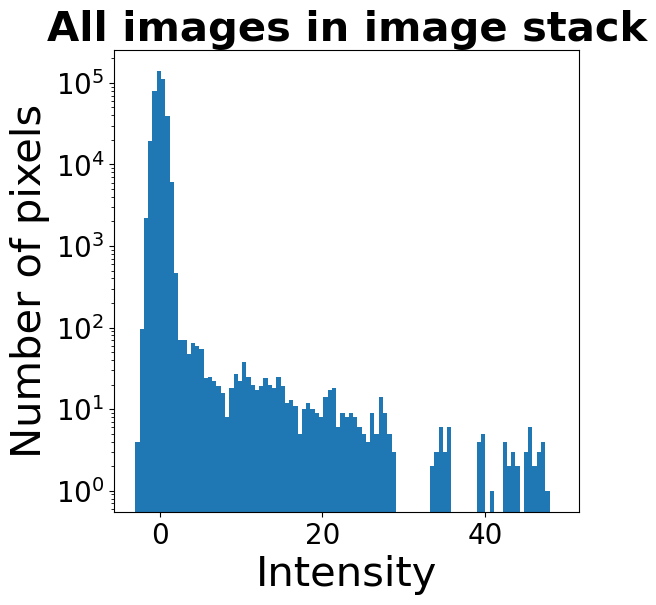

In [73]:
bins = np.linspace(np.floor(min(flat_list)), np.ceil(max(flat_list)+1), 100)

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('All images in image stack', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
plt.show()

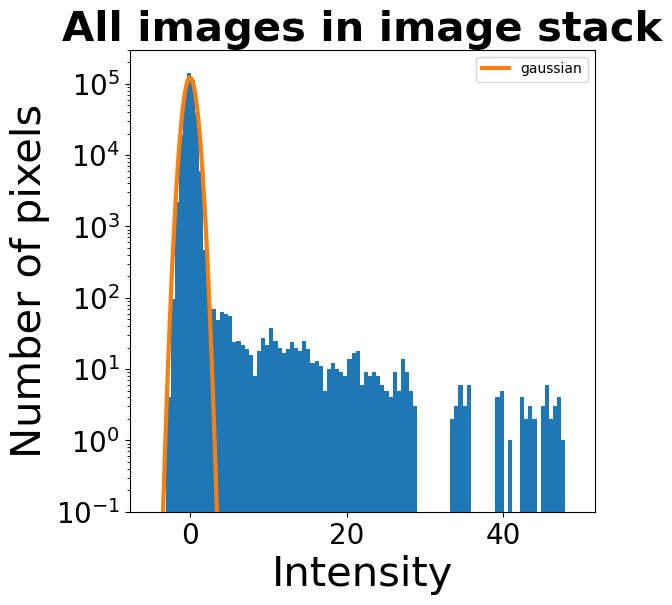

In [74]:
background = stats.norm(loc=0, scale=0.65)
x = np.linspace(-5, 5, 1000)
a = 2e5

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*a, linewidth = 3, label = 'gaussian')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('All images in image stack', fontsize = fsize, fontweight = 'bold')
ax.set_yscale('log')
ax.set_ylim([1e-1, 3e5])
ax.legend()
plt.show()

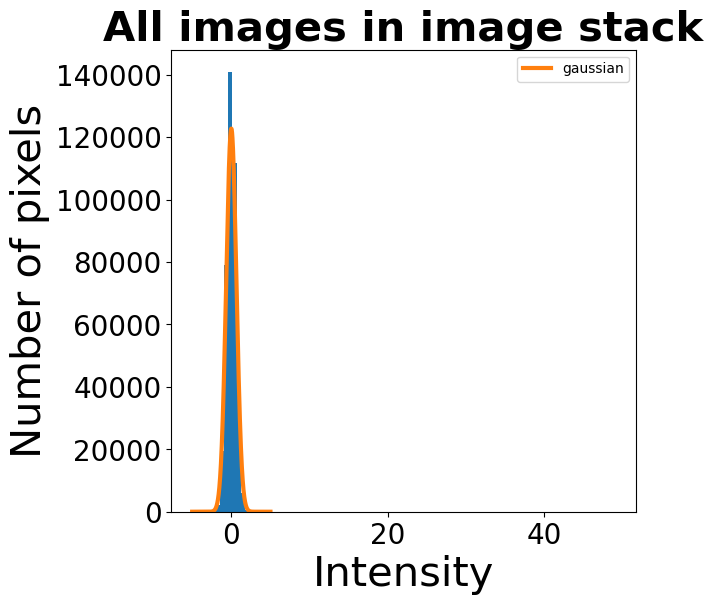

In [75]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 20)
ax.hist(flat_list, bins, linewidth = 3)
ax.plot(x, background.pdf(x)*a, linewidth = 3, label = 'gaussian')
ax.set_xlabel(f'Intensity', fontsize = fsize)
ax.set_ylabel(f'Number of pixels', fontsize = fsize)
ax.set_title('All images in image stack', fontsize = fsize, fontweight = 'bold')
# ax.set_ylim([1e-1, 3e5])
ax.legend()
plt.show()

This background:

background = stats.norm(loc=0, scale=0.65)*2e5

Seems to be a good fit for the data.

## 3)

So let's use this background distribution to hunt for a signal (a transient). We will look for a candidate with one of the higher intensities in the plot - one with an intensity value of ~13 (which we can see yields some detection on the plot above). Since we have our background, we can determine significances.

In [76]:
Y = 13

# prob_dist = stats.norm.sf(Y, loc = 0, scale = X) * N_pixels
# sigma = stats.norm.ppf(1-prob_dist / N_pixels)
prob = background.sf(Y)
sigma = abs(stats.norm.ppf(prob))
prob, sigma

(2.7536241186061556e-89, 20.000000000000004)

In [77]:
print(f'Thus, the sigma of a signal Y = {Y} is {sigma:.1f}.')

Thus, the sigma of a signal Y = 13 is 20.0.


This signal can be described as a very significant one as its sigma-value is very large (it is very unlikely the background produced this signal).

## 4)

My lab partner (who chose to look for faint stars instead of transients) had different pdf()s, but were using the same data.

This is likely because we chose to look for different detections in our data. While when looking for transients, I look for a strong excess in signals, one would when looking for faint stars look for a much weaker excess of signals.